In [2]:
!pip install openpyxl
# Încărcăm pachetele necesare
from sklearn.model_selection import train_test_split

# Structuri de date și unelte de analiză
import numpy as np
import pandas as pd

# Vizualizare
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

In [3]:
# Import date
file_path = 'date_tema_1_iaut_2024.csv'
dataset = pd.read_csv(file_path)

X = dataset.drop('Diagnostic', axis=1)
y = dataset['Diagnostic']

# Împărțim datele în setul de antrenare și setul de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Împărțim setul de antrenare în setul de antrenare și setul de validare
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2


## 1. Analiza echilibrului de clase

### Frecventa pentru setul de antrenare

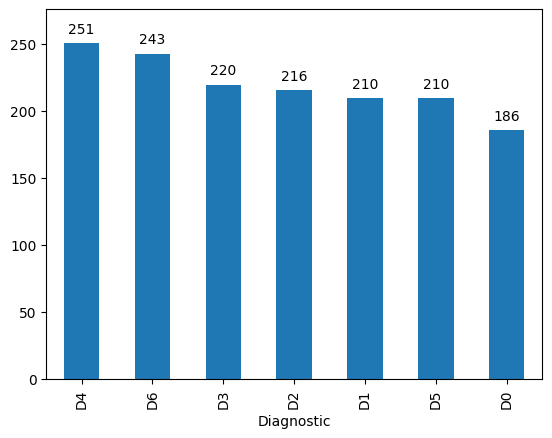

In [4]:
frecventa_clase = y_train.value_counts()

ax = frecventa_clase.plot.bar()
# Adăugăm valorile pe fiecare bară
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', 
                va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

ax.set_ylabel("")

# Mărim limita superioară a axei y cu 10% pentru a face loc pentru text
ax.set_ylim(0, 1.1 * frecventa_clase.max())

plt.show()

### Frecventa pentru setul de test

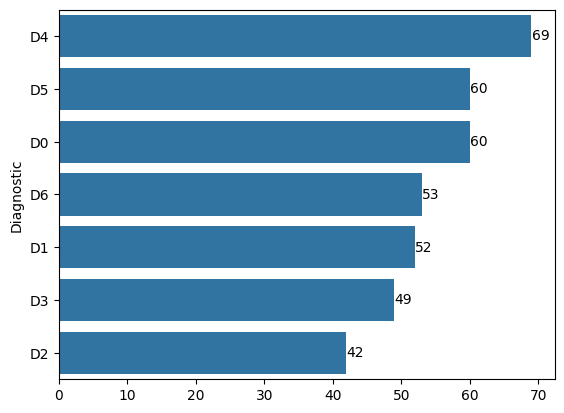

In [5]:
# Sortăm y_test în funcție de frecvența valorilor
y_test_sorted = y_test.value_counts().index

# Creăm un count plot cu frecvența claselor, ordonat
ax = sns.countplot(y=y_test, order=y_test_sorted)

# Obținem numărul de elemente pentru fiecare clasă, sortate în funcție de ordinea din grafic
num_elements = y_test.value_counts().loc[y_test_sorted]

# Adăugăm valorile pe fiecare bară
for i, p in enumerate(ax.patches):
    width = p.get_width()
    ax.text(width + 0.05,
            p.get_y() + p.get_height()/2.,
            '{}'.format(num_elements.iloc[i]), 
            va="center") 
            
ax.set_xlabel("")

plt.show()


## 2. Vizualizarea datelor

#### Numerice

In [6]:
atribute_numerice = ["Regular_fiber_diet", "Sedentary_hours_daily", "Age", "Est_avg_calorie_intake", "Main_meals_daily", 
                   "Height", "Water_daily", "Weight", "Physical_activity_level", "Technology_time_use"]

statistici = {
    'medii': [],
    'abateri_standard': [],
    'abateri_medii_absolute': [],
    'valori_minime': [],
    'valori_maxime': [],
    'diferente_max_min': [],
    'mediene': [],
    'abateri_mediane_absolute': [],
    'intervale_intercuartile': []
}

#### Convert to numeric

In [7]:
for atribut in atribute_numerice:
     # Verificăm dacă coloana este de tip string
    if dataset[atribut].dtype == 'object':
        # Înlocuim virgulele cu puncte și convertim șirurile de caractere în numere
        if atribut == "Sedentary_hours_daily" or atribut == "Height":
            dataset[atribut] = pd.to_numeric(dataset[atribut].str.replace(',', '.'), errors='coerce')
        else:
            dataset[atribut] = pd.to_numeric(dataset[atribut].str.replace(',', ''), errors='coerce')

#### Extrag atributele

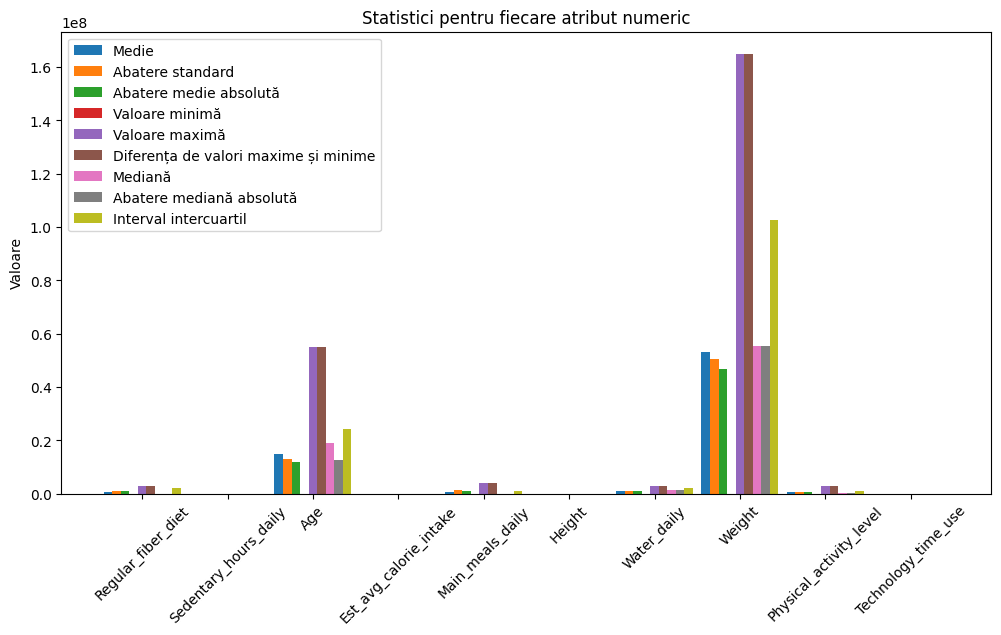

In [8]:
for atribut in atribute_numerice:
    # Extragem coloana corespunzătoare din setul de date
    coloana = dataset[atribut]
    
    # Calculăm statisticile și le adăugăm în dicționarul corespunzător
    statistici['medii'].append(coloana.mean())
    statistici['abateri_standard'].append(coloana.std())
    statistici['abateri_medii_absolute'].append(abs(coloana - coloana.mean()).mean())
    statistici['valori_minime'].append(coloana.min())
    statistici['valori_maxime'].append(coloana.max())
    statistici['diferente_max_min'].append(coloana.max() - coloana.min())
    statistici['mediene'].append(coloana.median())
    statistici['abateri_mediane_absolute'].append(abs(coloana - coloana.median()).median())
    statistici['intervale_intercuartile'].append(coloana.quantile(0.75) - coloana.quantile(0.25))

# Creăm un grafic de bare pentru fiecare statistică
x = np.arange(len(atribute_numerice))  # pozițiile pe axa x pentru grupele de bare
width = 0.1  # lățimea barelor

fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(x - 4*width, statistici['medii'], width, label='Medie')
ax.bar(x - 3*width, statistici['abateri_standard'], width, label='Abatere standard')
ax.bar(x - 2*width, statistici['abateri_medii_absolute'], width, label='Abatere medie absolută')
ax.bar(x - width, statistici['valori_minime'], width, label='Valoare minimă')
ax.bar(x, statistici['valori_maxime'], width, label='Valoare maximă')
ax.bar(x + width, statistici['diferente_max_min'], width, label='Diferența de valori maxime și minime')
ax.bar(x + 2*width, statistici['mediene'], width, label='Mediană')
ax.bar(x + 3*width, statistici['abateri_mediane_absolute'], width, label='Abatere mediană absolută')
ax.bar(x + 4*width, statistici['intervale_intercuartile'], width, label='Interval intercuartil')

# Adăugăm etichete, titlu și legenda
ax.set_ylabel('Valoare')
ax.set_title('Statistici pentru fiecare atribut numeric')
ax.set_xticks(x)
ax.set_xticklabels(atribute_numerice, rotation=45)
ax.legend()

plt.show()


In [9]:
def bar_value(bars):
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, round(yval, 2), ha = 'center', va = 'bottom')

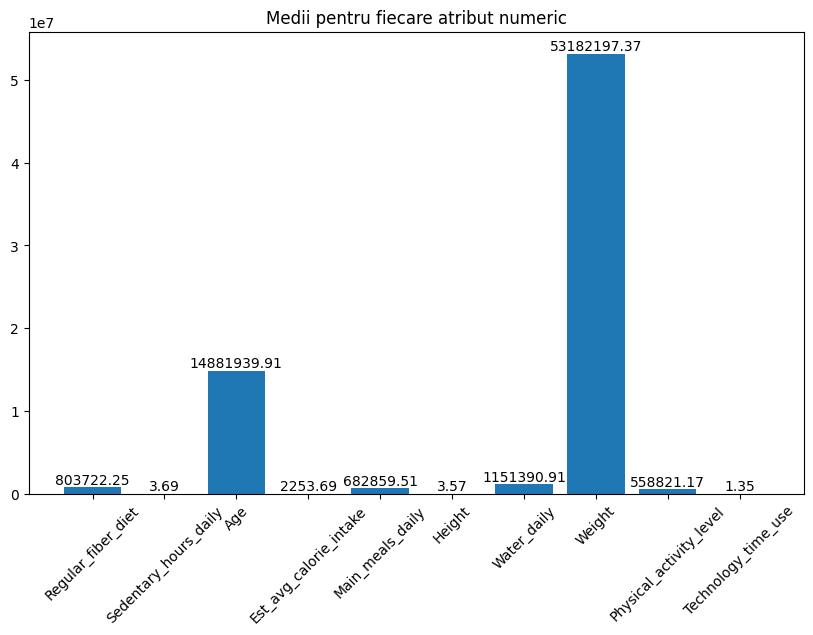

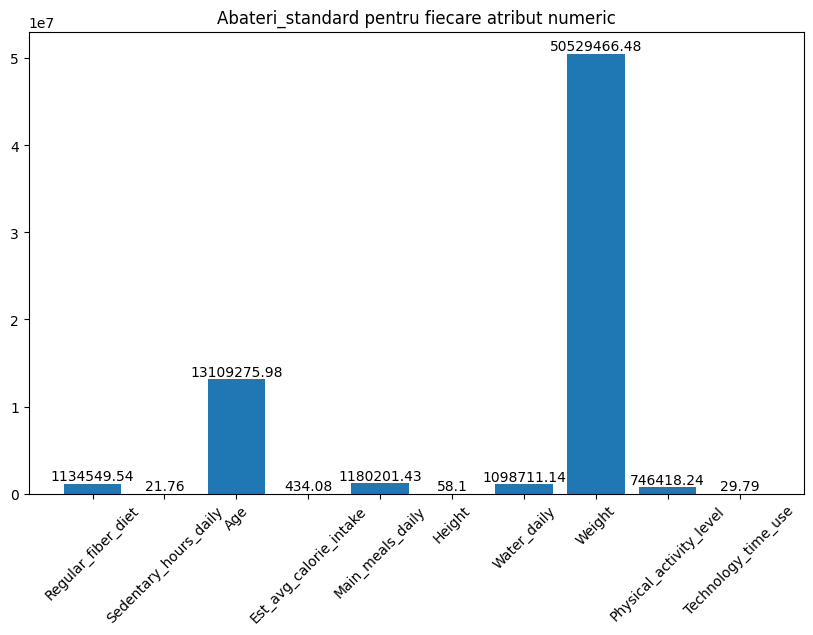

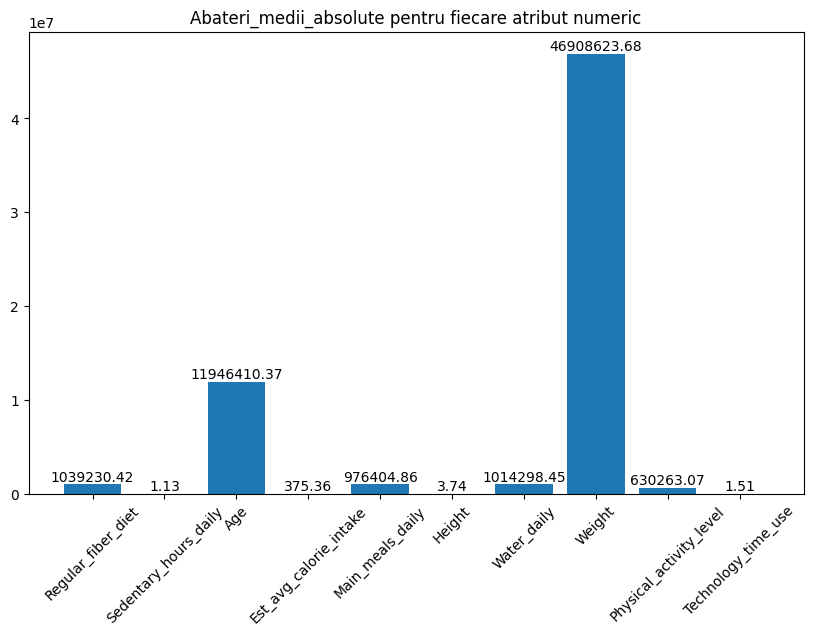

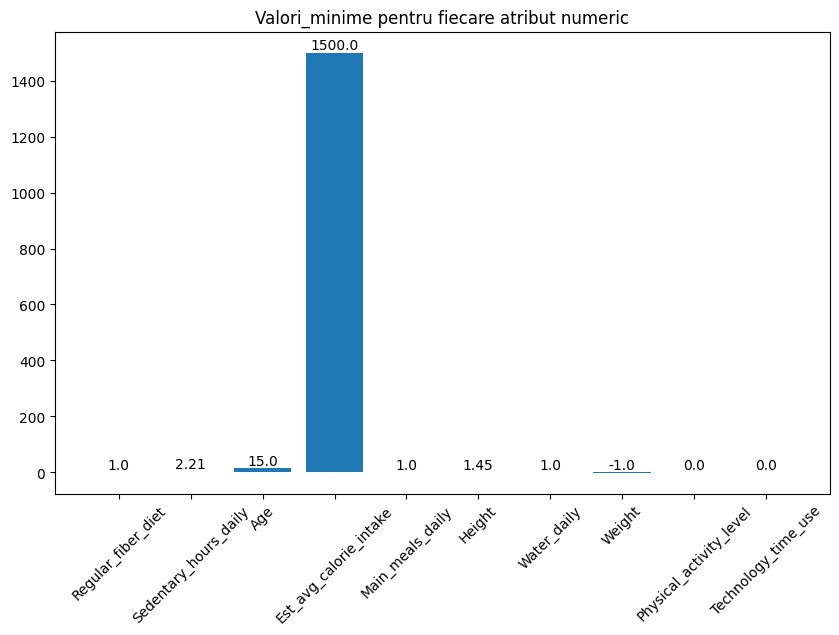

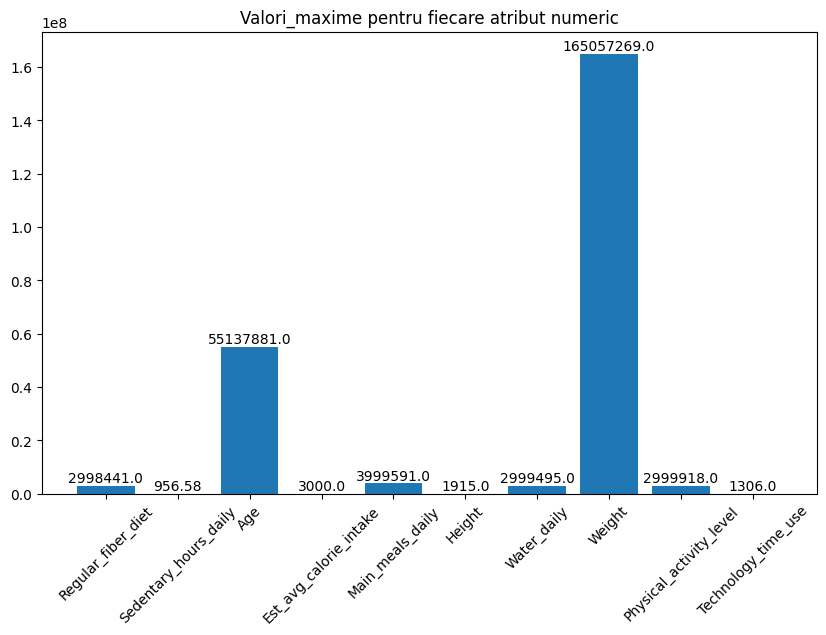

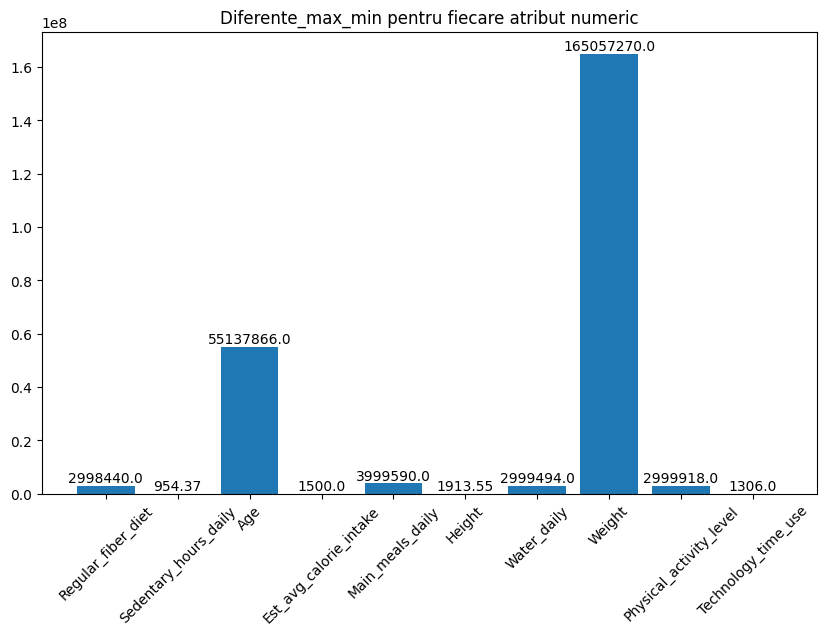

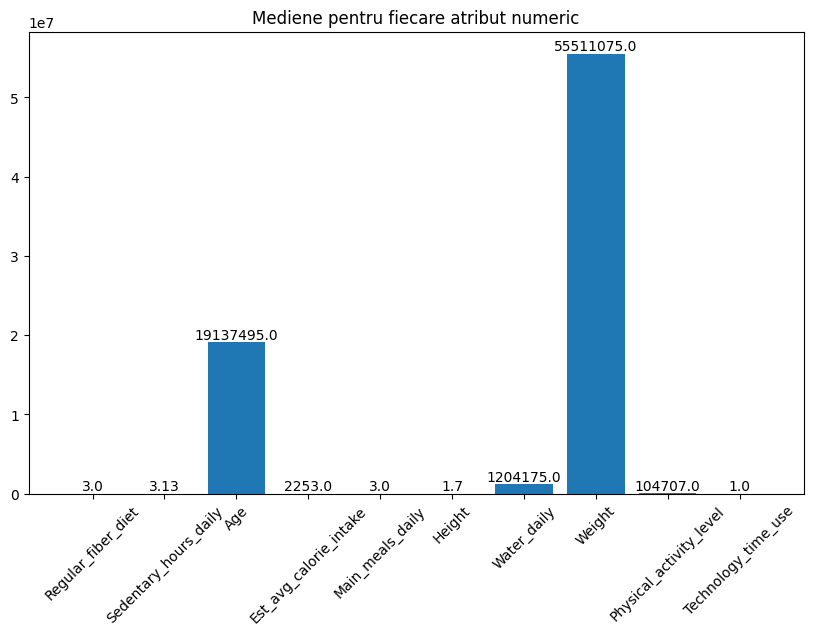

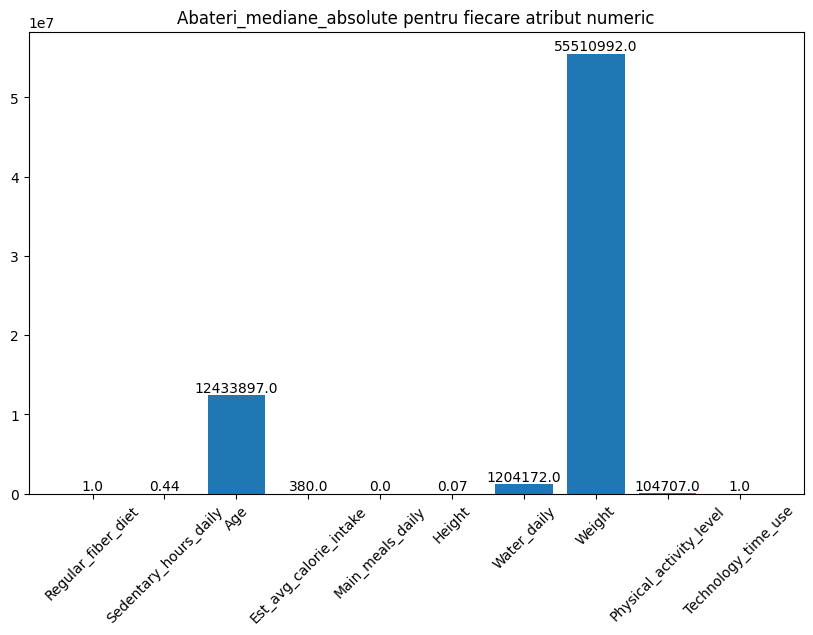

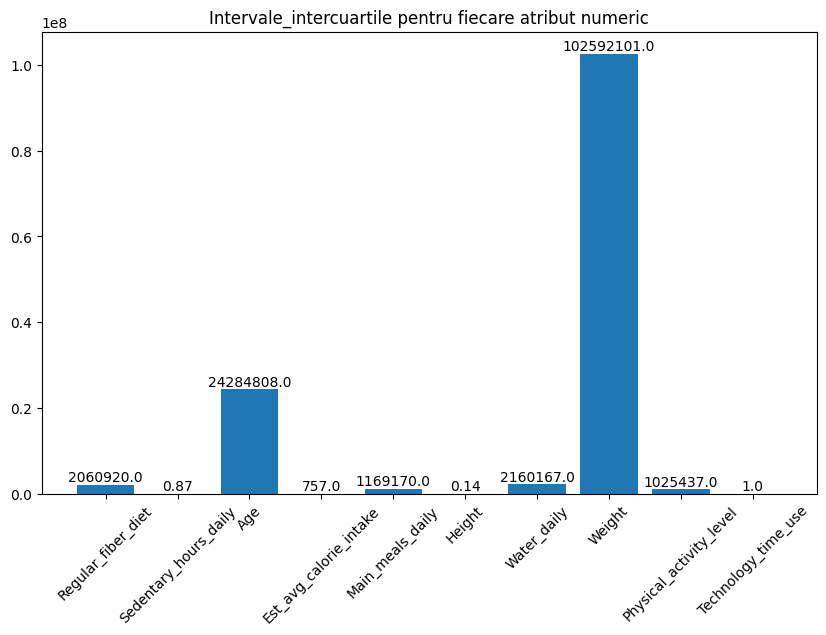

In [10]:
# Creăm un grafic de bare pentru fiecare statistică
x = np.arange(len(atribute_numerice))  # pozițiile pe axa x pentru grupele de bare

for nume_statistica, valori in statistici.items():
    plt.figure(figsize=(10, 6))
    bars = plt.bar(x, valori)
    plt.title(f'{nume_statistica.capitalize()} pentru fiecare atribut numeric')
    plt.xticks(x, atribute_numerice, rotation=45)

    # Adauga valoarea
    bar_value(bars)
    plt.show()




Nu avem probleme decal la EST_avg_calorie_intake deci la celelalte aplicam petoda de imputatie care face medie dar mai intai trebuie sa inlocuim peste tot unde avem valori eronate cu -1 ca flag

Functii de filtrare

In [11]:
def replace_invalid_diet(diet):
    if diet < 0 or diet > 1000: # o dieta sanatoasa 25-34 statistic oamenii 
                                # o incalca asa ca decid sa o fac intre 0-1000 
        return -1
    else:
        return diet
    
def replace_sedentary_hours(hours):
    if hours < 0 or hours > 24: 
        return -1
    else:
        return hours
    
def replace_invalid_age(age):
    if age < 0 or age > 122: # cel mai batran om inregistrat 122 ani
        return -1
    else:
        return age

# Pentru Est_avg_calorie_intake e ok

def replace_main_meals(meals):
    if meals < 0 or meals > 20: 
        return -1
    else:
        return meals
    
def replace_height(heihgt):
    if heihgt < 0.24 or heihgt > 2.72: # 0.24-2.72 
        return -1
    else:
        return heihgt

def replace_water_daily(water): 
    if water < 0 or water > 10: # (3.7 liters) of fluids a day am pus 10
                                # deoarece pentru sportivi poate fi altfel
        return -1
    else:
        return water

def replace_weight(weight): 
    if weight < 0 or weight > 200: # 635kg the heaviest, avem oameni average 
                                    # asa ca voi limita la 200
        return -1
    else:
        return weight

def replace_physical_activity_level(level): 
    if level < 0 or level > 20: # vad ca in general maxim e in jur de 3 asa ca 
                            # fac clamp la 20 in caz de orice inseamna acest level
        return -1
    else:
        return level
    
def replace_technology_time(hours): 
    if hours < 0 or hours > 24:
        return -1
    else:
        return hours

In [12]:
# Crearea unui dicționar care mapează numele coloanelor la funcțiile corespunzătoare
replace_functions = {
    'Regular_fiber_diet': replace_invalid_diet,
    'Sedentary_hours_daily': replace_sedentary_hours,
    'Age': replace_invalid_age,
    'Main_meals_daily': replace_main_meals,
    'Height': replace_height,
    'Water_daily': replace_water_daily,
    'Weight': replace_weight,
    'Physical_activity_level': replace_physical_activity_level,
    'Technology_time_use': replace_technology_time
}

# Parcurgerea fiecărei coloane și aplicarea funcției corespunzătoare
for atribut, function in replace_functions.items():
    dataset[atribut] = dataset[atribut].apply(function)

Aplicam imputer pentru a inlocui valorile -1 cu media

In [13]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=-1, strategy='mean')

for atribut in atribute_numerice:
    dataset[atribut] = imputer.fit_transform(dataset[atribut].values.reshape(-1, 1))

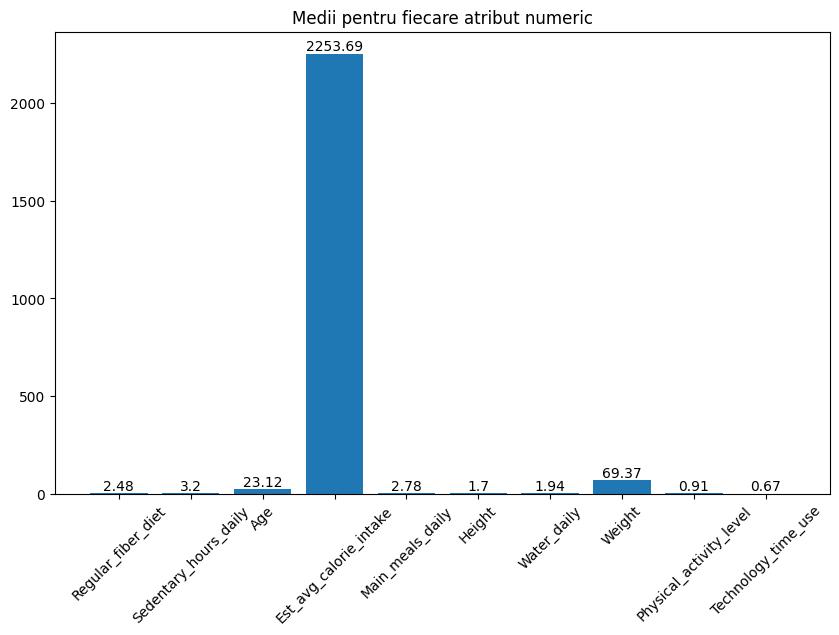

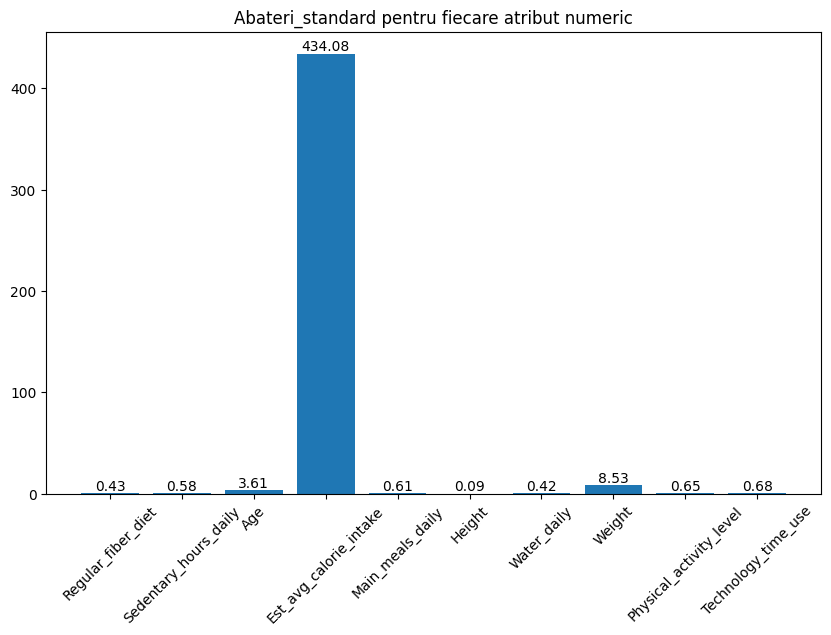

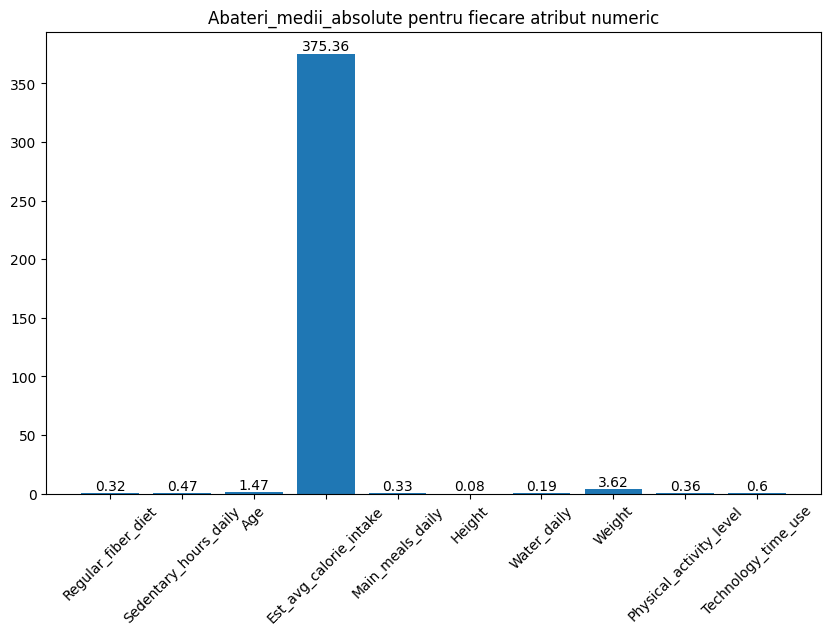

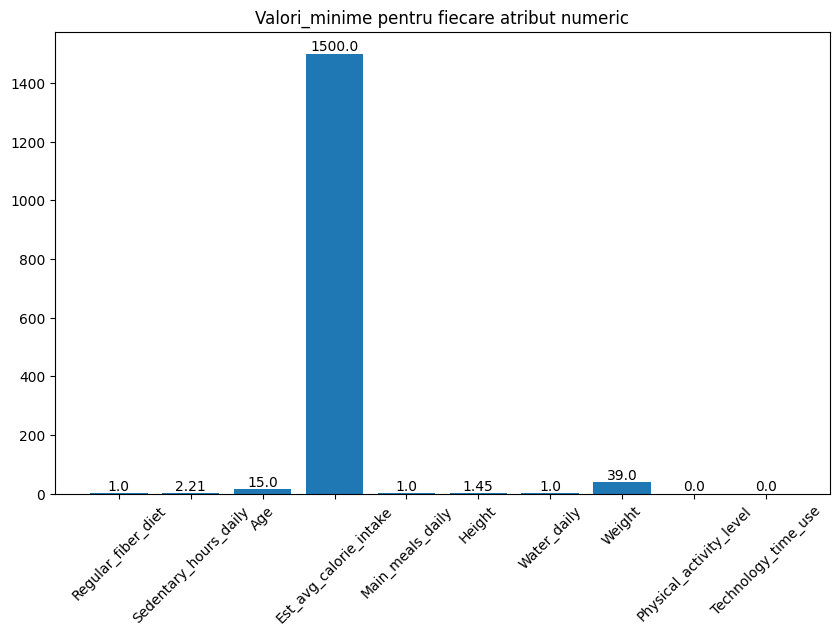

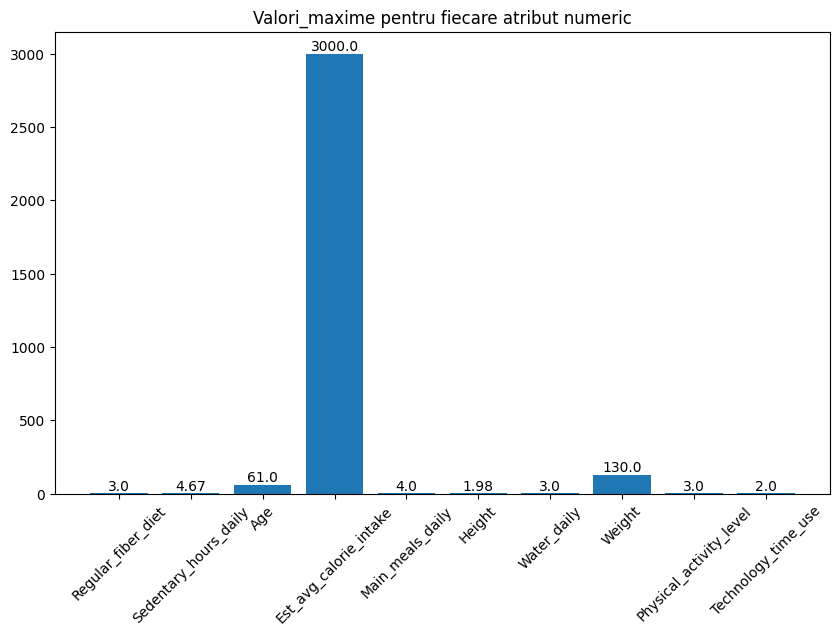

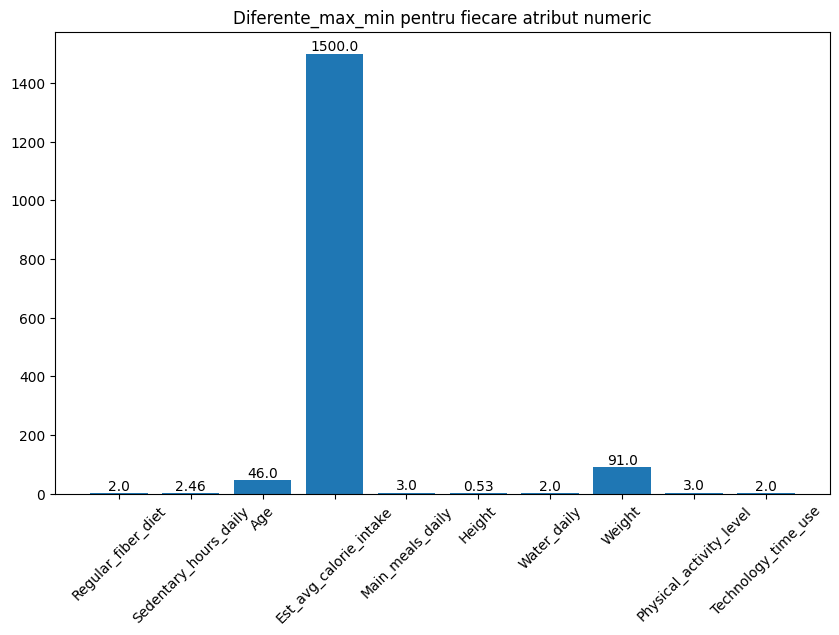

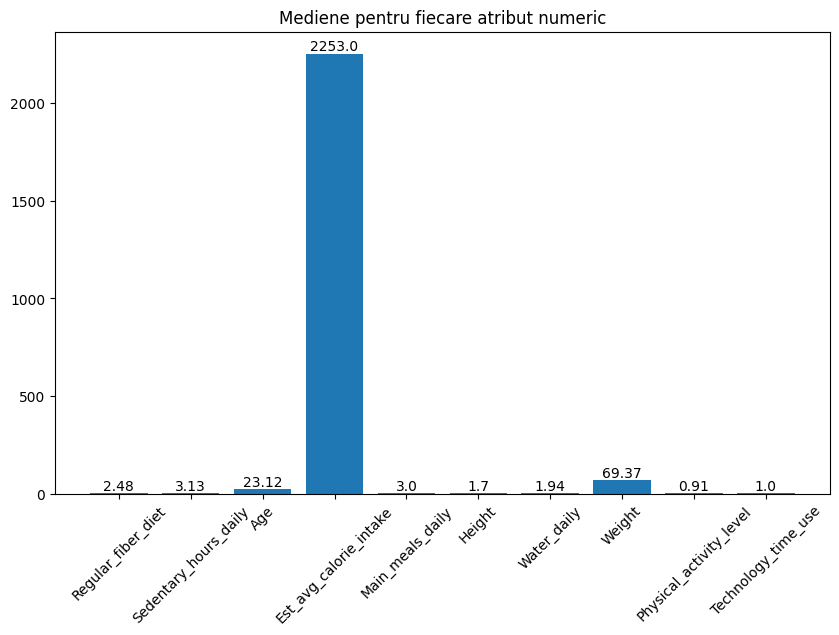

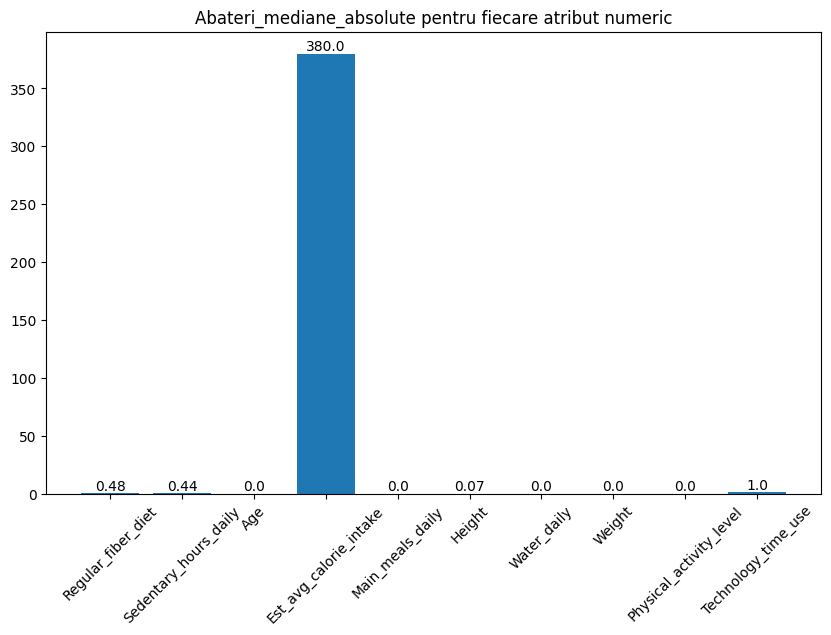

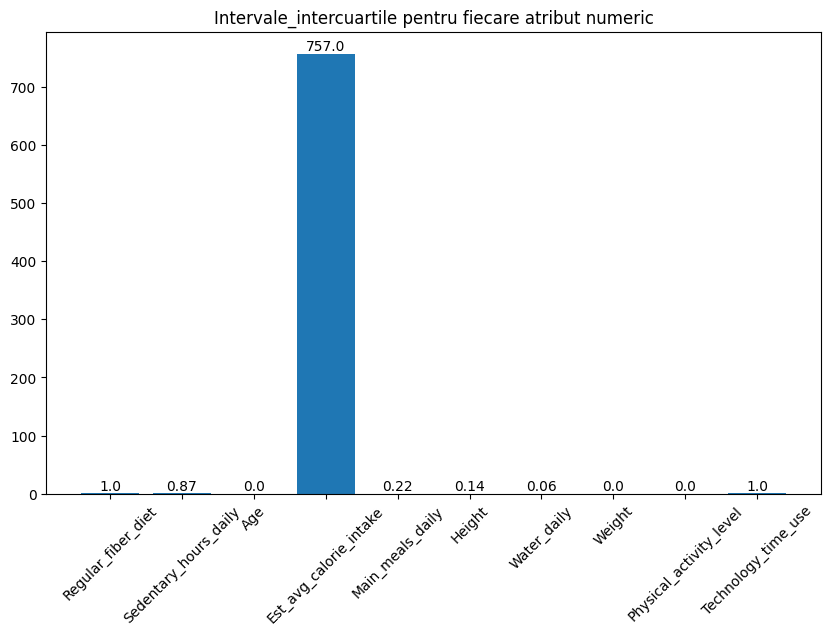

In [14]:
statistici = {
    'medii': [],
    'abateri_standard': [],
    'abateri_medii_absolute': [],
    'valori_minime': [],
    'valori_maxime': [],
    'diferente_max_min': [],
    'mediene': [],
    'abateri_mediane_absolute': [],
    'intervale_intercuartile': []
}

# Pentru fiecare atribut numeric
for atribut in atribute_numerice:
    # Extragem coloana corespunzătoare din setul de date
    coloana = dataset[atribut]


    # Calculăm statisticile și le adăugăm în dicționarul corespunzător
    statistici['medii'].append(coloana.mean())
    statistici['abateri_standard'].append(coloana.std())
    statistici['abateri_medii_absolute'].append(abs(coloana - coloana.mean()).mean())
    statistici['valori_minime'].append(coloana.min())
    statistici['valori_maxime'].append(coloana.max())
    statistici['diferente_max_min'].append(coloana.max() - coloana.min())
    statistici['mediene'].append(coloana.median())
    statistici['abateri_mediane_absolute'].append(abs(coloana - coloana.median()).median())
    statistici['intervale_intercuartile'].append(coloana.quantile(0.75) - coloana.quantile(0.25))

# Creăm un grafic de bare pentru fiecare statistică
x = np.arange(len(atribute_numerice))  # pozițiile pe axa x pentru grupele de bare

for nume_statistica, valori in statistici.items():
    plt.figure(figsize=(10, 6))
    bars = plt.bar(x, valori)
    plt.title(f'{nume_statistica.capitalize()} pentru fiecare atribut numeric')
    plt.xticks(x, atribute_numerice, rotation=45)

    # Adauga valoarea
    bar_value(bars)
    plt.show()

#### Nominale

Valorile unice pentru Transportation sunt:
Transportation
Public_Transportation    1427
Automobile                423
Walking                    53
Motorbike                  11
Bike                        7
Name: count, dtype: int64




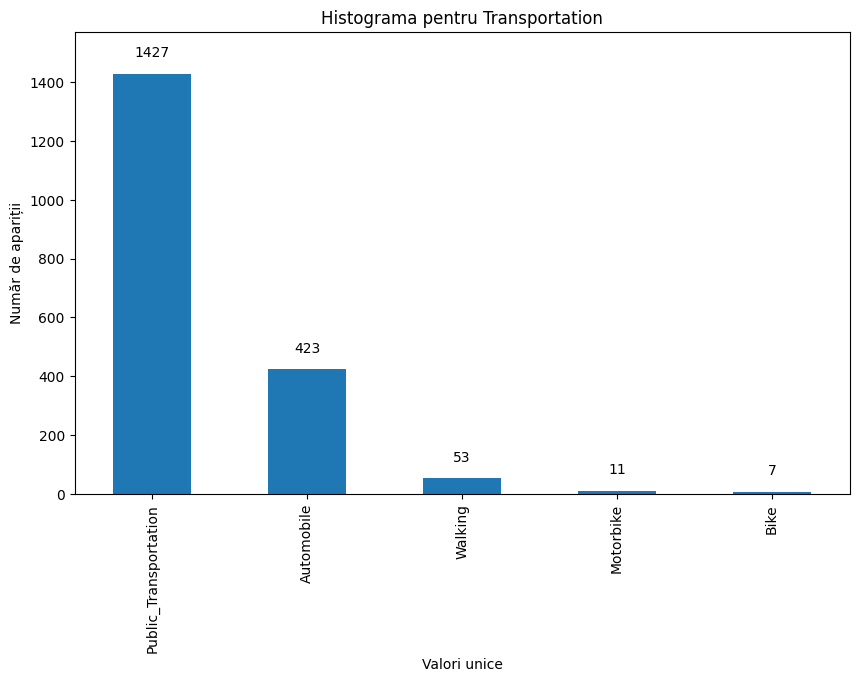

Valorile unice pentru Diagnostic_in_family_history sunt:
Diagnostic_in_family_history
yes    1573
no      348
Name: count, dtype: int64




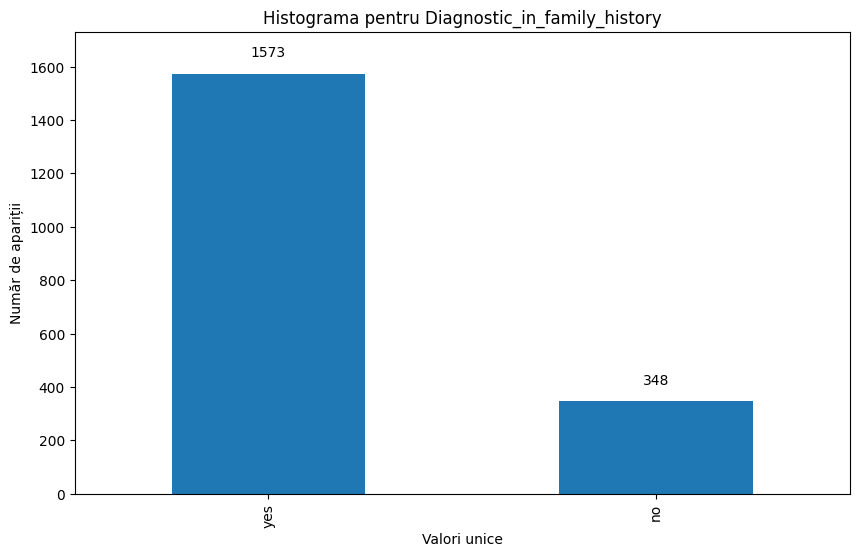

Valorile unice pentru High_calorie_diet sunt:
High_calorie_diet
yes    1697
no      224
Name: count, dtype: int64




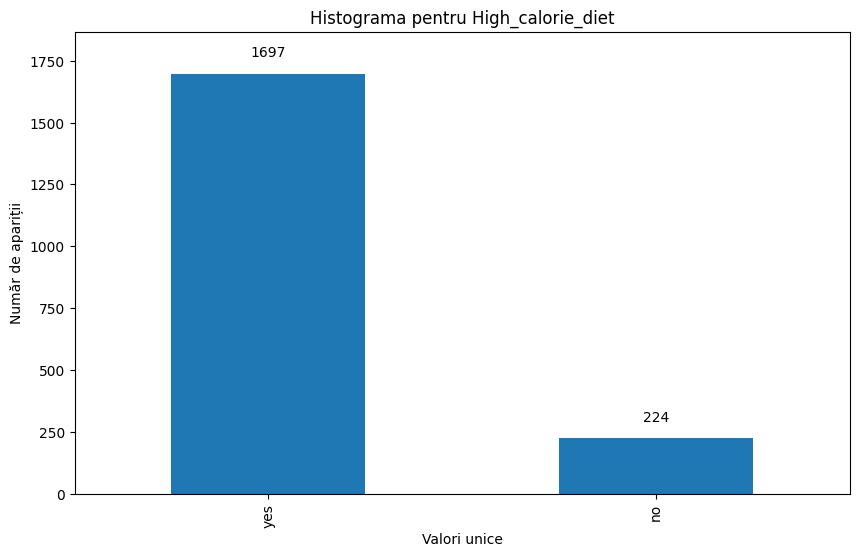

Valorile unice pentru Alcohol sunt:
Alcohol
Sometimes     1269
no             585
Frequently      66
Always           1
Name: count, dtype: int64




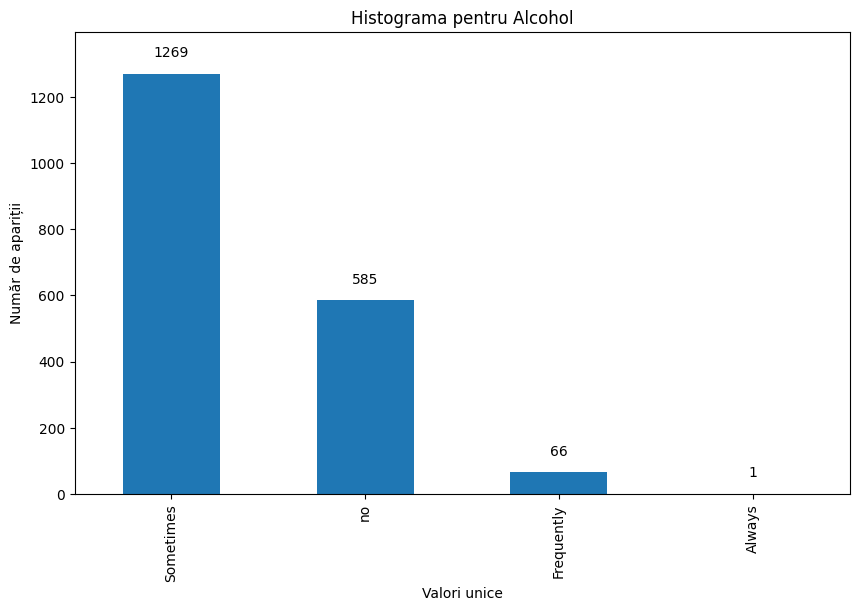

Valorile unice pentru Snacks sunt:
Snacks
Sometimes     1609
Frequently     221
Always          48
no              43
Name: count, dtype: int64




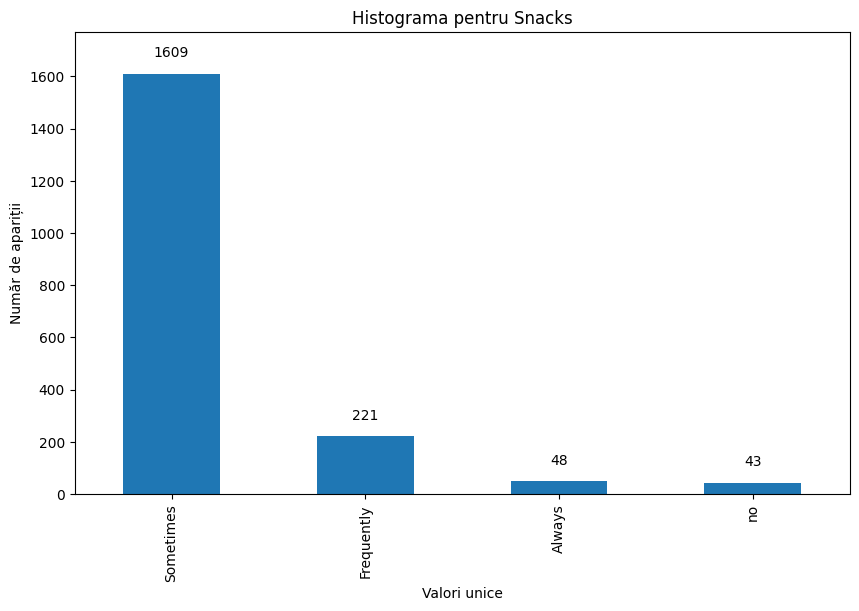

Valorile unice pentru Smoker sunt:
Smoker
no     1881
yes      40
Name: count, dtype: int64




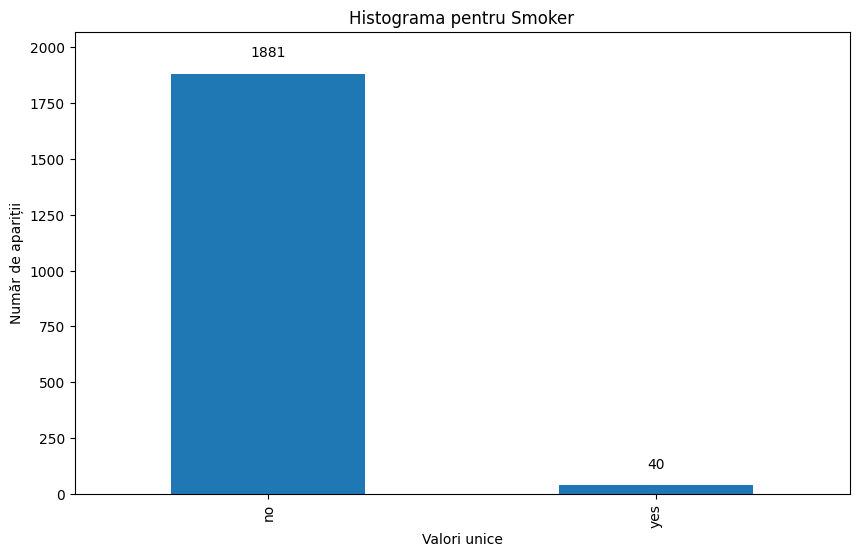

Valorile unice pentru Calorie_monitoring sunt:
Calorie_monitoring
no     1838
yes      83
Name: count, dtype: int64




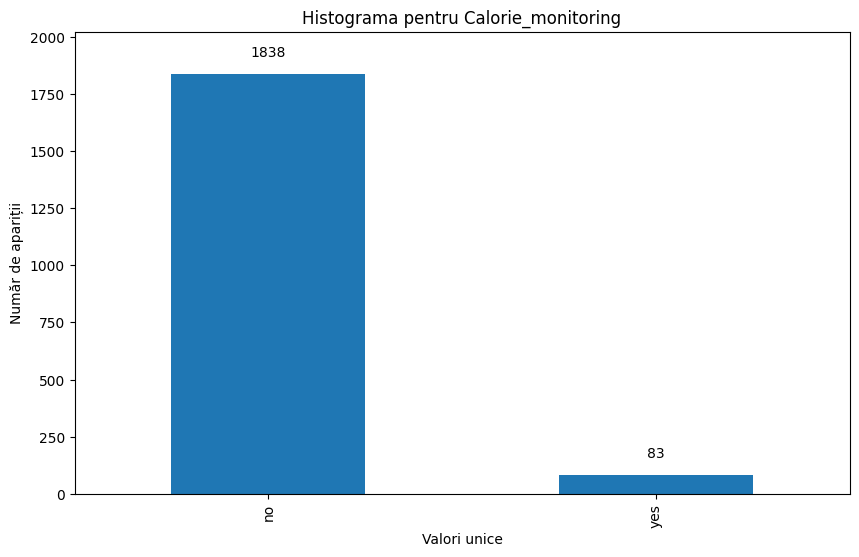

Valorile unice pentru Gender sunt:
Gender
Male      977
Female    944
Name: count, dtype: int64




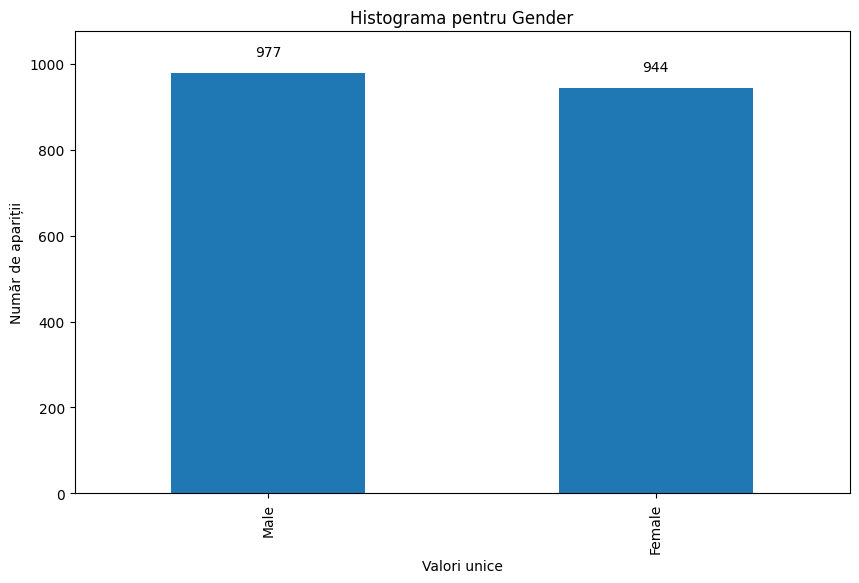

Valorile unice pentru Diagnostic sunt:
Diagnostic
D4    320
D6    296
D5    270
D3    269
D1    262
D2    258
D0    246
Name: count, dtype: int64




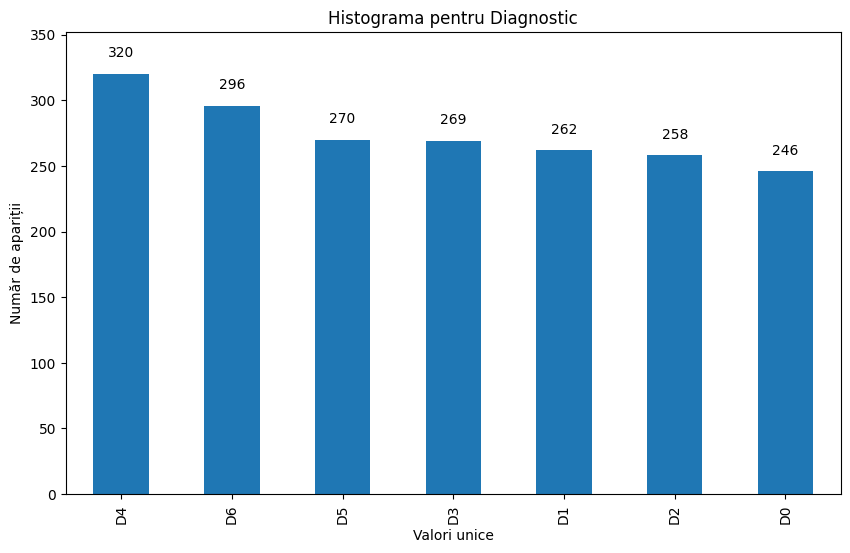

In [15]:
atribute_nominale = ["Transportation", "Diagnostic_in_family_history", "High_calorie_diet", "Alcohol", 
                   "Snacks", "Smoker", "Calorie_monitoring", "Gender", "Diagnostic"]

for atribut in atribute_nominale:
    # Extragem coloana corespunzătoare din setul de date
    coloana = dataset[atribut]

    # Calculăm numărul de apariții unice
    valori_unice = coloana.value_counts()

    # Afișăm valorile unice
    print(f'Valorile unice pentru {atribut} sunt:')
    print(valori_unice)
    print('\n')

    # Creăm o histogramă
    plt.figure(figsize=(10, 6))
    ax = valori_unice.plot.bar()

    # Adăugăm valorile pe fiecare bară
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', 
                    va = 'bottom', 
                    xytext = (0, 10), 
                    textcoords = 'offset points')

    ax.set_ylim(0, 1.1 * valori_unice.max())
    plt.title(f'Histograma pentru {atribut}')
    plt.xlabel('Valori unice')
    plt.ylabel('Număr de apariții')
    plt.show()  # Afișează graficul


In [16]:
# Selectarea doar a coloanelor numerice
dataset_numeric = dataset.select_dtypes(include=[np.number])

# Calcularea matricei de covarianță
cov_matrix = dataset_numeric.cov()

# Afișarea matricei de covarianță
print(cov_matrix)
# Exportăm matricea de covarianță într-un fișier Excel
cov_matrix.to_excel("cov_matrix.xlsx")


                         Regular_fiber_diet  Sedentary_hours_daily        Age  \
Regular_fiber_diet                 0.182132              -0.014643   0.145675   
Sedentary_hours_daily             -0.014643               0.331322  -0.281650   
Age                                0.145675              -0.281650  13.043330   
Est_avg_calorie_intake            -6.357666               4.431328 -20.706911   
Main_meals_daily                   0.018172               0.019913  -0.065465   
Height                            -0.000450               0.002715  -0.010547   
Water_daily                       -0.002073               0.014345   0.007549   
Weight                            -0.186181              -0.079828   6.681962   
Physical_activity_level           -0.006124               0.016075  -0.253123   
Technology_time_use               -0.026299               0.336414  -0.405093   

                         Est_avg_calorie_intake  Main_meals_daily    Height  \
Regular_fiber_diet           

# 3.2

In [17]:
from copy import deepcopy
from sklearn.preprocessing import LabelEncoder # type: ignore

df = deepcopy(dataset)
le = LabelEncoder()

for atribut in atribute_nominale:
    if atribut != "Diagnostic":
        print(atribut)
        # Fit and transform the 'Transportation' column
        df[atribut] = le.fit_transform(df[atribut])

        print("Label Encoding Mapping:")
        for class_, label in zip(le.classes_, range(len(le.classes_))):
            print(f"{class_}: {label}")
    
    print("\n")


Transportation
Label Encoding Mapping:
Automobile: 0
Bike: 1
Motorbike: 2
Public_Transportation: 3
Walking: 4


Diagnostic_in_family_history
Label Encoding Mapping:
no: 0
yes: 1


High_calorie_diet
Label Encoding Mapping:
no: 0
yes: 1


Alcohol
Label Encoding Mapping:
Always: 0
Frequently: 1
Sometimes: 2
no: 3


Snacks
Label Encoding Mapping:
Always: 0
Frequently: 1
Sometimes: 2
no: 3


Smoker
Label Encoding Mapping:
no: 0
yes: 1


Calorie_monitoring
Label Encoding Mapping:
no: 0
yes: 1


Gender
Label Encoding Mapping:
Female: 0
Male: 1






Algoritmi

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold, SelectPercentile
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Selectarea doar a coloanelor numerice
dataset_numeric = df.select_dtypes(include=[np.number])

# Crearea unui scaler
scaler = StandardScaler()

# Standardizarea datelor numerice
dataset_scaled = scaler.fit_transform(dataset_numeric)

print(dataset_scaled.shape)

print(dataset_scaled.shape)

# Impartim din nou setul de date
X = dataset_scaled
y = dataset['Diagnostic']

# Împărțim datele în setul de antrenare și setul de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

(1921, 18)
(1921, 18)


In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
!pip install xgboost
from xgboost import XGBClassifier

{'C': 100, 'kernel': 'rbf'}


Classification Report:
              precision    recall  f1-score   support

          D0       0.89      0.70      0.79        60
          D1       0.60      0.83      0.69        52
          D2       0.61      0.60      0.60        42
          D3       0.67      0.71      0.69        49
          D4       0.81      0.64      0.72        69
          D5       0.77      0.85      0.81        60
          D6       0.98      0.98      0.98        53

    accuracy                           0.76       385
   macro avg       0.76      0.76      0.75       385
weighted avg       0.77      0.76      0.76       385

Confusion Matrix:
[[42 14  2  1  1  0  0]
 [ 2 43  0  4  2  1  0]
 [ 2  6 25  4  2  3  0]
 [ 0  2  8 35  2  2  0]
 [ 0  5  6  4 44  9  1]
 [ 1  2  0  4  2 51  0]
 [ 0  0  0  0  1  0 52]]


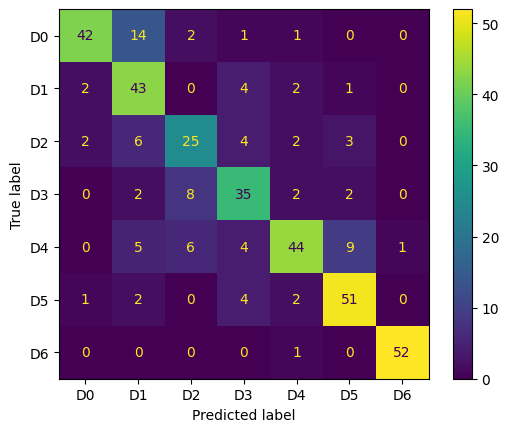

In [20]:
# Pentru SVM
param_grid = {'C': [0.1, 1, 10, 100], 'kernel': ['rbf']}
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)
print("\n")
# Pentru fiecare algoritm
y_pred = grid_search.best_estimator_.predict(X_test)

# Generarea raportului de clasificare pentru excel
report = classification_report(y_test, y_pred, output_dict=True)

print("Classification Report:")
print(classification_report(y_test, y_pred))

# Transformarea raportului într-un DataFrame
report_df = pd.DataFrame(report).transpose()

# Scrierea DataFrame-ului într-un fișier Excel
report_df.to_excel("classification_report_SVM.xlsx")

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

classes = np.unique(y_pred)

# Crearea unei instanțe a ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)

# Afișarea matricei de confuzie cu etichetele de clasă
disp.plot()

Manual RandomForest

In [41]:
# Pentru RandomForest
from sklearn.metrics import accuracy_score

estim = [10, 50, 100]
depth = [None, 10, 20, 30]
features = ['sqrt', 'log2', None]

# Crearea unui DataFrame pentru a stoca rezultatele
results = pd.DataFrame(columns=['n_estimators', 'max_depth', 'max_features', 'accuracy'])

for n_estim in estim:
    for max_dep in depth:
        for max_feat in features:
            # Configurarea hiper-parametrilor
            param_grid = {'n_estimators': [n_estim], 'max_depth': [max_dep], 'max_features': [max_feat]}
            grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
            
            # Antrenarea modelului
            grid_search.fit(X_train, y_train)

            # Obținerea celor mai buni hiper-parametri
            best_params = grid_search.best_params_

            # Predicția pe setul de test
            y_pred = grid_search.best_estimator_.predict(X_test)

            # Calcularea acurateței
            accuracy = accuracy_score(y_test, y_pred)

            # Adăugarea rezultatelor în DataFrame
            results.loc[len(results)] = [best_params['n_estimators'], best_params['max_depth'], best_params['max_features'], accuracy]

print(results)
# Salvarea rezultatelor într-un fișier Excel
results.to_excel("results.xlsx", index=False)


    n_estimators max_depth max_features  accuracy
0           10.0      None         sqrt  0.750649
1           10.0      None         log2  0.735065
2           10.0       NaN          NaN  0.745455
3           10.0        10         sqrt  0.740260
4           10.0        10         log2  0.750649
5           10.0      10.0          NaN  0.755844
6           10.0        20         sqrt  0.742857
7           10.0        20         log2  0.742857
8           10.0      20.0          NaN  0.761039
9           10.0        30         sqrt  0.750649
10          10.0        30         log2  0.737662
11          10.0      30.0          NaN  0.740260
12          50.0      None         sqrt  0.794805
13          50.0      None         log2  0.779221
14          50.0       NaN          NaN  0.768831
15          50.0        10         sqrt  0.766234
16          50.0        10         log2  0.753247
17          50.0      10.0          NaN  0.742857
18          50.0        20         sqrt  0.774026


Grid Search RandomForest

{'max_depth': 20, 'max_features': 'sqrt', 'n_estimators': 100}


Classification Report:
              precision    recall  f1-score   support

          D0       0.94      0.75      0.83        60
          D1       0.69      0.94      0.80        52
          D2       0.76      0.62      0.68        42
          D3       0.80      0.73      0.77        49
          D4       0.87      0.78      0.82        69
          D5       0.80      0.95      0.87        60
          D6       0.96      0.98      0.97        53

    accuracy                           0.83       385
   macro avg       0.83      0.82      0.82       385
weighted avg       0.84      0.83      0.83       385

Confusion Matrix:
[[45 11  1  0  1  1  1]
 [ 1 49  0  1  1  0  0]
 [ 2  6 26  1  3  4  0]
 [ 0  2  5 36  3  3  0]
 [ 0  2  2  4 54  6  1]
 [ 0  1  0  2  0 57  0]
 [ 0  0  0  1  0  0 52]]


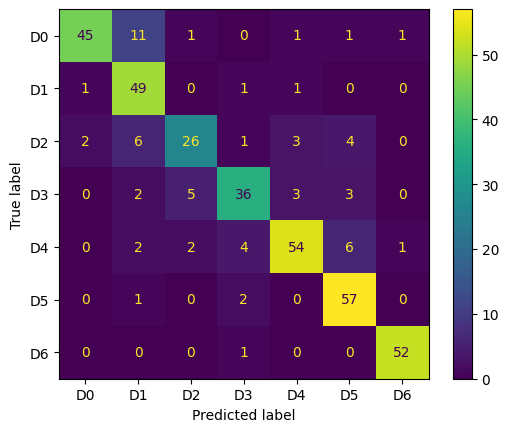

In [22]:
param_grid = {'n_estimators': [10, 50, 100], 'max_depth': [None, 10, 20, 30], 'max_features': ['sqrt', 'log2', None]}
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)
print("\n")
# Pentru fiecare algoritm
y_pred = grid_search.best_estimator_.predict(X_test)

# Generarea raportului de clasificare pentru excel
report = classification_report(y_test, y_pred, output_dict=True)

print("Classification Report:")
print(classification_report(y_test, y_pred))

# Transformarea raportului într-un DataFrame
report_df = pd.DataFrame(report).transpose()

# Scrierea DataFrame-ului într-un fișier Excel
report_df.to_excel("classification_report_RDM_FRST.xlsx")

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

classes = np.unique(y_pred)

# Crearea unei instanțe a ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)

# Afișarea matricei de confuzie cu etichetele de clasă
disp.plot()

Best Hiper-Parametri Random Forest

{'max_depth': 20, 'max_features': 'sqrt', 'n_estimators': 100}


Classification Report:
              precision    recall  f1-score   support

          D0       0.96      0.75      0.84        60
          D1       0.68      0.96      0.79        52
          D2       0.73      0.64      0.68        42
          D3       0.79      0.67      0.73        49
          D4       0.88      0.77      0.82        69
          D5       0.79      0.93      0.85        60
          D6       0.96      0.98      0.97        53

    accuracy                           0.82       385
   macro avg       0.83      0.82      0.81       385
weighted avg       0.83      0.82      0.82       385

Confusion Matrix:
[[45 11  2  0  0  1  1]
 [ 0 50  0  1  1  0  0]
 [ 2  7 27  0  2  4  0]
 [ 0  2  8 33  3  3  0]
 [ 0  3  0  5 53  7  1]
 [ 0  1  0  2  1 56  0]
 [ 0  0  0  1  0  0 52]]


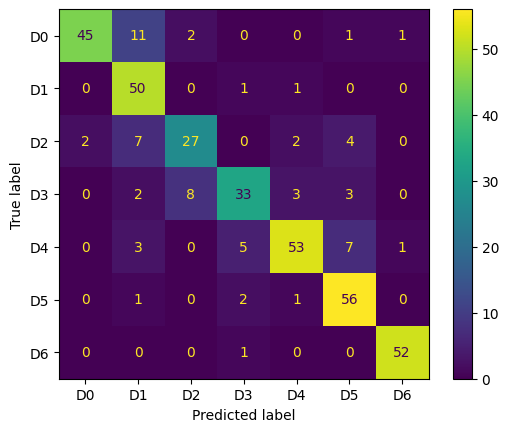

In [23]:
param_grid = {'n_estimators': [100], 'max_depth': [20], 'max_features': ['sqrt']}
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)
print("\n")
# Pentru fiecare algoritm
y_pred = grid_search.best_estimator_.predict(X_test)

# Generarea raportului de clasificare pentru excel
report = classification_report(y_test, y_pred, output_dict=True)

print("Classification Report:")
print(classification_report(y_test, y_pred))

# Transformarea raportului într-un DataFrame
report_df = pd.DataFrame(report).transpose()

# Scrierea DataFrame-ului într-un fișier Excel
report_df.to_excel("classification_report_RDM_FRST.xlsx")

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

classes = np.unique(y_pred)

# Crearea unei instanțe a ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)

# Afișarea matricei de confuzie cu etichetele de clasă
disp.plot()

Grid-Search ExtraTrees

{'max_depth': 20, 'max_features': 'sqrt', 'n_estimators': 100}


Classification Report:
              precision    recall  f1-score   support

          D0       0.98      0.78      0.87        60
          D1       0.70      0.87      0.78        52
          D2       0.68      0.71      0.70        42
          D3       0.76      0.76      0.76        49
          D4       0.90      0.77      0.83        69
          D5       0.78      0.87      0.82        60
          D6       0.96      0.98      0.97        53

    accuracy                           0.82       385
   macro avg       0.82      0.82      0.82       385
weighted avg       0.83      0.82      0.82       385

Confusion Matrix:
[[47 10  2  0  0  1  0]
 [ 1 45  3  3  0  0  0]
 [ 0  6 30  0  2  4  0]
 [ 0  1  7 37  2  2  0]
 [ 0  1  2  3 53  8  2]
 [ 0  1  0  5  2 52  0]
 [ 0  0  0  1  0  0 52]]


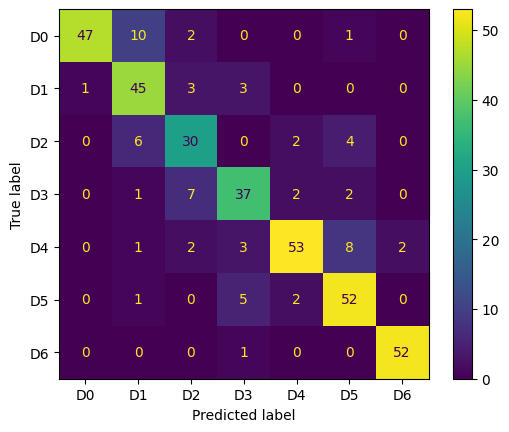

In [24]:
# Pentru ExtraTrees
param_grid = {'n_estimators': [10, 50, 100], 'max_depth': [None, 10, 20, 30], 'max_features': ['sqrt', 'log2', None]}
grid_search = GridSearchCV(ExtraTreesClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)
print("\n")
# Pentru fiecare algoritm
y_pred = grid_search.best_estimator_.predict(X_test)

# Generarea raportului de clasificare pentru excel
report = classification_report(y_test, y_pred, output_dict=True)

print("Classification Report:")
print(classification_report(y_test, y_pred))

# Transformarea raportului într-un DataFrame
report_df = pd.DataFrame(report).transpose()

# Scrierea DataFrame-ului într-un fișier Excel
report_df.to_excel("classification_report_EX_Trees.xlsx")

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

classes = np.unique(y_pred)

# Crearea unei instanțe a ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)

# Afișarea matricei de confuzie cu etichetele de clasă
disp.plot()


Manual ExtraTrees:

In [25]:
# Pentru ExtraTrees
from sklearn.metrics import accuracy_score

estim = [10, 50, 100]
depth = [None, 10, 20, 30]
features = ['sqrt', 'log2', None]

# Crearea unui DataFrame pentru a stoca rezultatele
results = pd.DataFrame(columns=['n_estimators', 'max_depth', 'max_features', 'accuracy'])

for n_estim in estim:
    for max_dep in depth:
        for max_feat in features:
            # Configurarea hiper-parametrilor
            param_grid = {'n_estimators': [n_estim], 'max_depth': [max_dep], 'max_features': [max_feat]}
            grid_search = GridSearchCV(ExtraTreesClassifier(), param_grid, cv=5)
            
            # Antrenarea modelului
            grid_search.fit(X_train, y_train)

            # Obținerea celor mai buni hiper-parametri
            best_params = grid_search.best_params_

            # Predicția pe setul de test
            y_pred = grid_search.best_estimator_.predict(X_test)

            # Calcularea acurateței
            accuracy = accuracy_score(y_test, y_pred)

            # Adăugarea rezultatelor în DataFrame
            results.loc[len(results)] = [best_params['n_estimators'], best_params['max_depth'], best_params['max_features'], accuracy]

print(results)
# Salvarea rezultatelor într-un fișier Excel
results.to_excel("results_ExtraTrees.xlsx", index=False)


    n_estimators max_depth max_features  accuracy
0           10.0      None         sqrt  0.776623
1           10.0      None         log2  0.776623
2           10.0       NaN          NaN  0.794805
3           10.0        10         sqrt  0.711688
4           10.0        10         log2  0.742857
5           10.0      10.0          NaN  0.748052
6           10.0        20         sqrt  0.797403
7           10.0        20         log2  0.781818
8           10.0      20.0          NaN  0.812987
9           10.0        30         sqrt  0.784416
10          10.0        30         log2  0.779221
11          10.0      30.0          NaN  0.797403
12          50.0      None         sqrt  0.823377
13          50.0      None         log2  0.810390
14          50.0       NaN          NaN  0.815584
15          50.0        10         sqrt  0.753247
16          50.0        10         log2  0.750649
17          50.0      10.0          NaN  0.763636
18          50.0        20         sqrt  0.802597


Best Hiper-Parametri ExtraTrees

{'max_depth': 20, 'max_features': 'sqrt', 'n_estimators': 50}


Classification Report:
              precision    recall  f1-score   support

          D0       0.91      0.80      0.85        60
          D1       0.68      0.81      0.74        52
          D2       0.69      0.64      0.67        42
          D3       0.73      0.78      0.75        49
          D4       0.88      0.74      0.80        69
          D5       0.76      0.85      0.80        60
          D6       0.96      0.98      0.97        53

    accuracy                           0.80       385
   macro avg       0.80      0.80      0.80       385
weighted avg       0.81      0.80      0.80       385

Confusion Matrix:
[[48 10  1  0  0  1  0]
 [ 2 42  4  4  0  0  0]
 [ 2  5 27  0  4  4  0]
 [ 0  2  5 38  1  3  0]
 [ 1  2  2  3 51  8  2]
 [ 0  1  0  6  2 51  0]
 [ 0  0  0  1  0  0 52]]


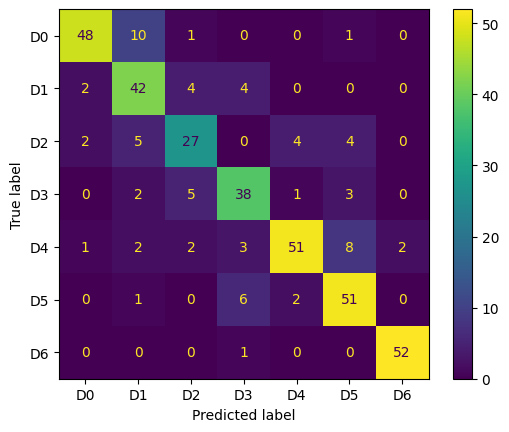

In [26]:
# Pentru ExtraTrees
param_grid = {'n_estimators': [50], 'max_depth': [20], 'max_features': ['sqrt']}
grid_search = GridSearchCV(ExtraTreesClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)
print("\n")
# Pentru fiecare algoritm
y_pred = grid_search.best_estimator_.predict(X_test)

# Generarea raportului de clasificare pentru excel
report = classification_report(y_test, y_pred, output_dict=True)

print("Classification Report:")
print(classification_report(y_test, y_pred))

# Transformarea raportului într-un DataFrame
report_df = pd.DataFrame(report).transpose()

# Scrierea DataFrame-ului într-un fișier Excel
report_df.to_excel("classification_report_EX_Trees.xlsx")

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

classes = np.unique(y_pred)

# Crearea unei instanțe a ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)

# Afișarea matricei de confuzie cu etichetele de clasă
disp.plot()


Grid-Search pentru GradientBoostedTrees

{'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 50}


Classification Report:
              precision    recall  f1-score   support

          D0       0.94      0.75      0.83        60
          D1       0.74      0.88      0.81        52
          D2       0.67      0.57      0.62        42
          D3       0.77      0.73      0.75        49
          D4       0.82      0.74      0.78        69
          D5       0.76      0.95      0.84        60
          D6       0.95      0.98      0.96        53

    accuracy                           0.81       385
   macro avg       0.81      0.80      0.80       385
weighted avg       0.81      0.81      0.81       385

Confision Matrix:
[[45  7  4  2  0  1  1]
 [ 1 46  2  3  0  0  0]
 [ 1  5 24  1  5  6  0]
 [ 0  2  3 36  4  4  0]
 [ 1  1  3  4 51  7  2]
 [ 0  1  0  1  1 57  0]
 [ 0  0  0  0  1  0 52]]


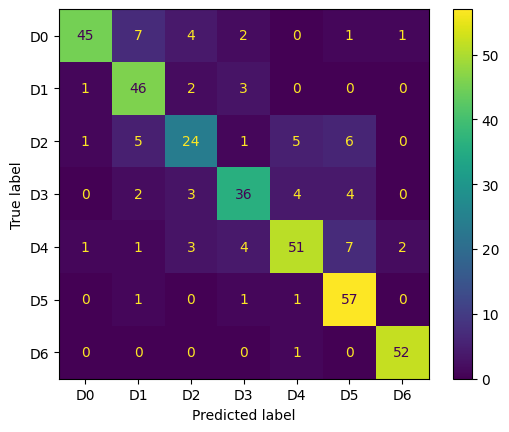

In [27]:
# Pentru GradientBoostedTrees
# Crearea unui LabelEncoder
le = LabelEncoder()

# Transformarea etichetelor de clasă
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# print("Label Encoding Mapping:")
# for class_, label in zip(le.classes_, range(len(le.classes_))):
#     print(f"{class_}: {label}")

param_grid = {'n_estimators': [10, 50, 100], 'max_depth': [3, 10, 20, 30], 'learning_rate': [0.1, 0.01, 0.001]}
grid_search = GridSearchCV(XGBClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train_encoded)

print(grid_search.best_params_)
print("\n")

# Pentru fiecare algoritm
y_pred = grid_search.best_estimator_.predict(X_test)

y_pred_decoded = le.inverse_transform(y_pred)

# Generarea raportului de clasificare pentru excel
report = classification_report(y_test, y_pred_decoded, output_dict=True)

print("Classification Report:")
print(classification_report(y_test, y_pred_decoded))

# Transformarea raportului într-un DataFrame
report_df = pd.DataFrame(report).transpose()

# Scrierea DataFrame-ului într-un fișier Excel
report_df.to_excel("classification_report_GR_Boost.xlsx")

# Crearea matricei de confuzie
cm = confusion_matrix(y_test_encoded, y_pred)

print("Confision Matrix:")
print(cm)

# Crearea unei instanțe a ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)

# Afișarea matricei de confuzie cu etichetele de clasă
disp.plot()


Manual GradientBoostedTrees

In [28]:
# Crearea unui LabelEncoder
le = LabelEncoder()

# Transformarea etichetelor de clasă
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

estim = [10, 50, 100]
depth = [3, 10, 20, 30]
learning_rate = [0.1, 0.01, 0.001]

# Crearea unui DataFrame pentru a stoca rezultatele
results = pd.DataFrame(columns=['n_estimators', 'max_depth', 'learning_rate', 'accuracy'])

for n_estim in estim:
    for max_dep in depth:
        for lr in learning_rate:
            # Configurarea hiper-parametrilor
            param_grid = {'n_estimators': [n_estim], 'max_depth': [max_dep], 'learning_rate': [lr]}
            grid_search = GridSearchCV(XGBClassifier(), param_grid, cv=5)
            
            # Antrenarea modelului
            grid_search.fit(X_train, y_train_encoded)

            # Obținerea celor mai buni hiper-parametri
            best_params = grid_search.best_params_

            # Predicția pe setul de test
            y_pred = grid_search.best_estimator_.predict(X_test)

            # Calcularea acurateței
            accuracy = accuracy_score(y_test_encoded, y_pred)

            # Adăugarea rezultatelor în DataFrame
            results.loc[len(results)] = [best_params['n_estimators'], best_params['max_depth'], best_params['learning_rate'], accuracy]

print(results)
# Salvarea rezultatelor într-un fișier Excel
results.to_excel("results_GradientBoostedTrees.xlsx", index=False)

    n_estimators  max_depth  learning_rate  accuracy
0           10.0        3.0          0.100  0.683117
1           10.0        3.0          0.010  0.641558
2           10.0        3.0          0.001  0.646753
3           10.0       10.0          0.100  0.774026
4           10.0       10.0          0.010  0.758442
5           10.0       10.0          0.001  0.750649
6           10.0       20.0          0.100  0.794805
7           10.0       20.0          0.010  0.771429
8           10.0       20.0          0.001  0.763636
9           10.0       30.0          0.100  0.794805
10          10.0       30.0          0.010  0.771429
11          10.0       30.0          0.001  0.763636
12          50.0        3.0          0.100  0.727273
13          50.0        3.0          0.010  0.662338
14          50.0        3.0          0.001  0.633766
15          50.0       10.0          0.100  0.807792
16          50.0       10.0          0.010  0.766234
17          50.0       10.0          0.001  0.

Best Hiper-Parametri GradientBoostedTrees

{'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 100}


Classification Report:
              precision    recall  f1-score   support

          D0       0.94      0.77      0.84        60
          D1       0.75      0.87      0.80        52
          D2       0.71      0.60      0.65        42
          D3       0.76      0.76      0.76        49
          D4       0.85      0.77      0.81        69
          D5       0.75      0.95      0.84        60
          D6       0.96      0.98      0.97        53

    accuracy                           0.82       385
   macro avg       0.82      0.81      0.81       385
weighted avg       0.82      0.82      0.82       385

Confision Matrix:
[[46  7  4  1  0  1  1]
 [ 1 45  2  4  0  0  0]
 [ 1  5 25  2  3  6  0]
 [ 0  2  1 37  4  5  0]
 [ 1  0  3  4 53  7  1]
 [ 0  1  0  1  1 57  0]
 [ 0  0  0  0  1  0 52]]


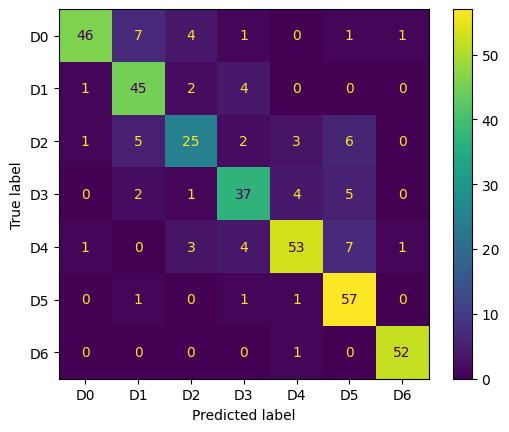

In [29]:
# Pentru GradientBoostedTrees
# Crearea unui LabelEncoder
le = LabelEncoder()

# Transformarea etichetelor de clasă
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# print("Label Encoding Mapping:")
# for class_, label in zip(le.classes_, range(len(le.classes_))):
#     print(f"{class_}: {label}")

param_grid = {'n_estimators': [100], 'max_depth': [10], 'learning_rate': [0.1]}
grid_search = GridSearchCV(XGBClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train_encoded)

print(grid_search.best_params_)
print("\n")

# Pentru fiecare algoritm
y_pred = grid_search.best_estimator_.predict(X_test)

y_pred_decoded = le.inverse_transform(y_pred)

# Generarea raportului de clasificare pentru excel
report = classification_report(y_test, y_pred_decoded, output_dict=True)

print("Classification Report:")
print(classification_report(y_test, y_pred_decoded))

# Transformarea raportului într-un DataFrame
report_df = pd.DataFrame(report).transpose()

# Scrierea DataFrame-ului într-un fișier Excel
report_df.to_excel("classification_report_GR_Boost.xlsx")

# Crearea matricei de confuzie
cm = confusion_matrix(y_test_encoded, y_pred)

print("Confision Matrix:")
print(cm)

# Crearea unei instanțe a ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)

# Afișarea matricei de confuzie cu etichetele de clasă
disp.plot()


## Variance Play

Inainte:
(1921, 18)


Threshold:
0.1
dataset redus la:
(1921, 15)

Caracteristicile eliminate:
Index(['Height', 'Smoker', 'Calorie_monitoring'], dtype='object')


SVM:
{'C': 10, 'kernel': 'rbf'}


Classification Report:
              precision    recall  f1-score   support

          D0       0.81      0.73      0.77        60
          D1       0.63      0.71      0.67        52
          D2       0.51      0.50      0.51        42
          D3       0.62      0.57      0.60        49
          D4       0.81      0.62      0.70        69
          D5       0.65      0.85      0.73        60
          D6       0.96      0.98      0.97        53

    accuracy                           0.72       385
   macro avg       0.71      0.71      0.71       385
weighted avg       0.73      0.72      0.72       385

Confusion Matrix:
Threshold:
0.2
dataset redus la:
(1921, 11)

Caracteristicile eliminate:
Index(['Regular_fiber_diet', 'Diagnostic_in_family_history',
       'High_calorie_diet', 'He

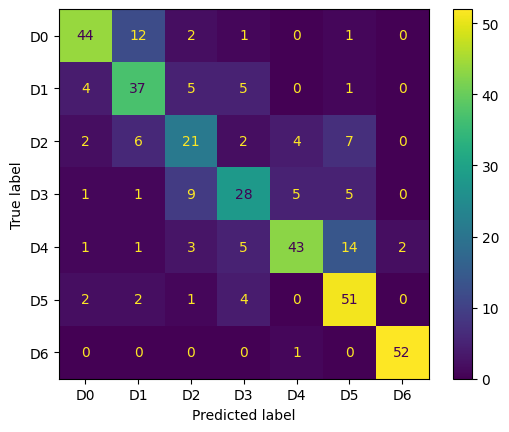

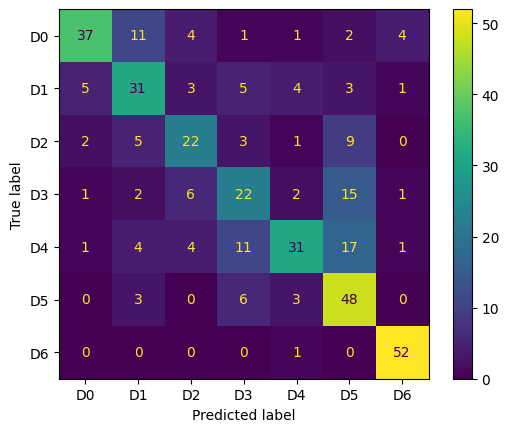

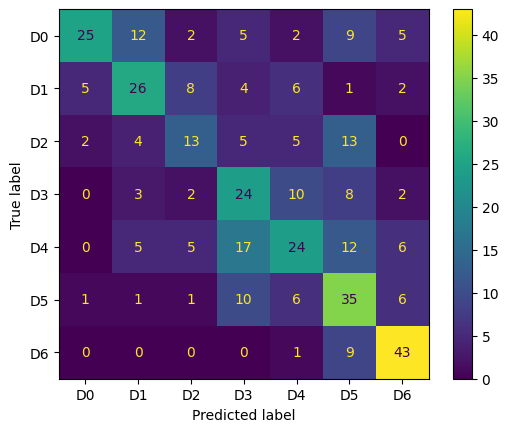

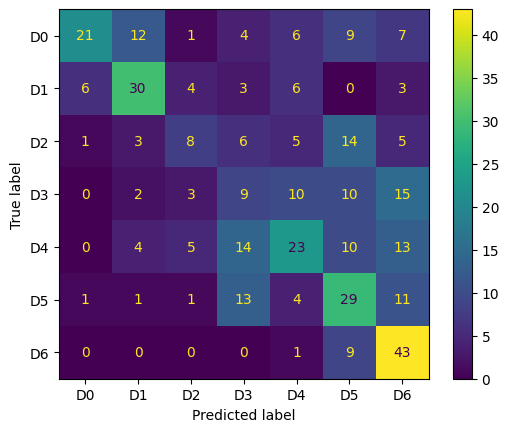

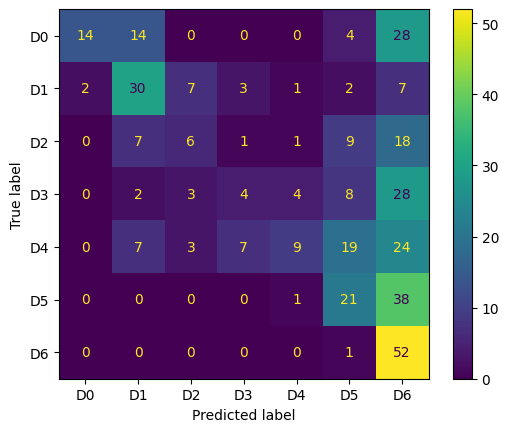

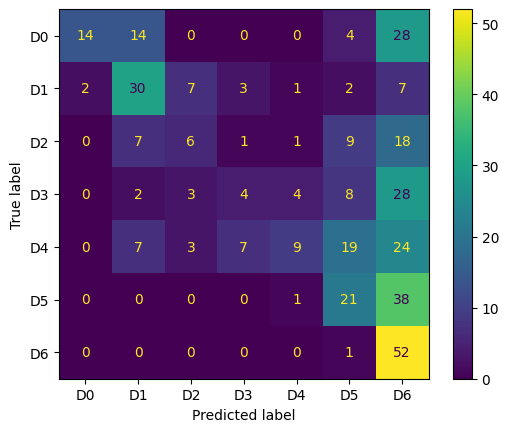

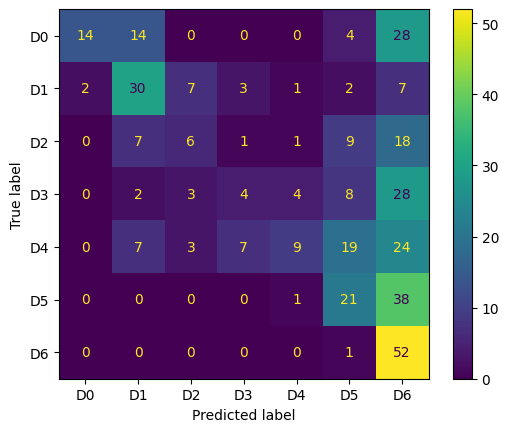

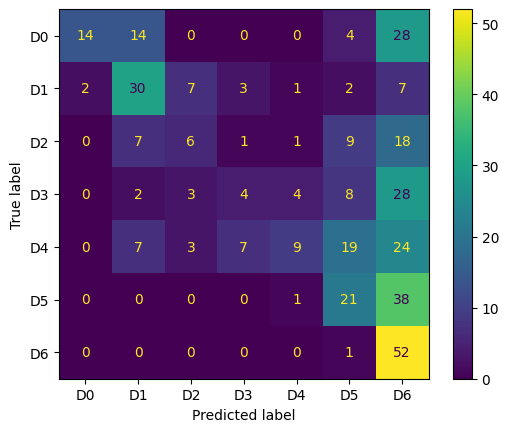

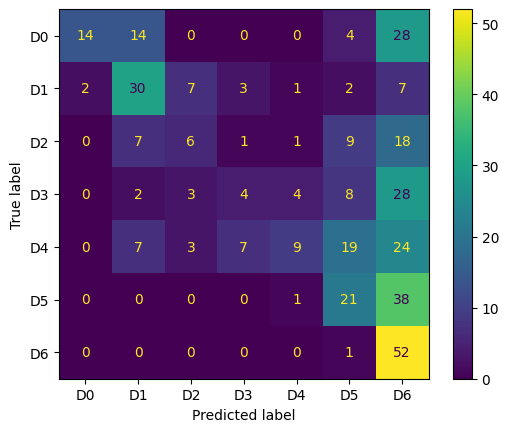

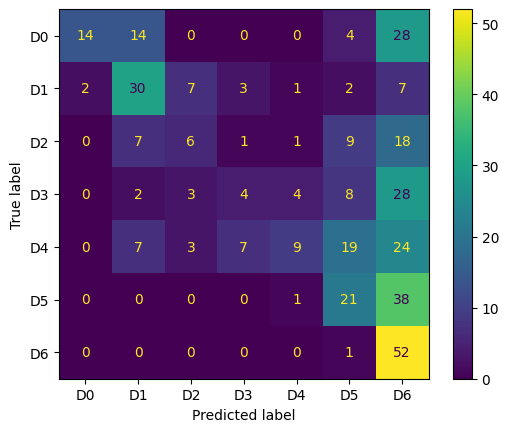

In [30]:
!pip install xgboost
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay




# Selectarea doar a coloanelor numerice
dataset_numeric = df.select_dtypes(include=[np.number])

print("Inainte:")
print(dataset_numeric.shape)
print("\n")

ran = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

for i in ran:
    print("Threshold:")
    print(i)
    
    # Aplicarea VarianceThreshold
    selector = VarianceThreshold(threshold=i)
    dataset_reduced = selector.fit_transform(dataset_numeric)
    
    print("dataset redus la:")
    print(dataset_reduced.shape)
    # Obținerea măștii de caracteristici selectate
    mask = selector.get_support()

    # Obținerea numelor caracteristicilor eliminate
    removed_features = dataset_numeric.columns[~mask]
    print("\nCaracteristicile eliminate:")
    print(removed_features)
   
    # Crearea unui scaler
    scaler = StandardScaler()

    # Standardizarea datelor numerice
    dataset_scaled = scaler.fit_transform(dataset_reduced)

    X = dataset_scaled
    y = dataset['Diagnostic']

    # Împărțim datele în setul de antrenare și setul de test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    print("\n")
    print("SVM:")
    # Pentru SVM
    param_grid = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}
    grid_search = GridSearchCV(SVC(), param_grid, cv=5)
    grid_search.fit(X_train, y_train)

    print(grid_search.best_params_)
    print("\n")
    # Pentru fiecare algoritm
    y_pred = grid_search.best_estimator_.predict(X_test)

    # Generarea raportului de clasificare pentru excel
    report = classification_report(y_test, y_pred, output_dict=True)

    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Transformarea raportului într-un DataFrame
    report_df = pd.DataFrame(report).transpose()

    # Scrierea DataFrame-ului într-un fișier Excel
    report_df.to_excel("classification_report_SVM.xlsx")

    cm = confusion_matrix(y_test, y_pred)
    # print("Confusion Matrix:")
    # print(cm)

    print("Confusion Matrix:")

    classes = np.unique(y_pred)

    # Crearea unei instanțe a ConfusionMatrixDisplay
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)

    # Afișarea matricei de confuzie cu etichetele de clasă
    disp.plot()



Inainte:
(1921, 18)


Threshold:
0.1
dataset redus la:
(1921, 15)

Caracteristicile eliminate:
Index(['Height', 'Smoker', 'Calorie_monitoring'], dtype='object')


Random Forest:
{'max_depth': None, 'max_features': 'log2', 'n_estimators': 50}


Classification Report:
              precision    recall  f1-score   support

          D0       0.92      0.73      0.81        60
          D1       0.66      0.90      0.76        52
          D2       0.73      0.57      0.64        42
          D3       0.66      0.67      0.67        49
          D4       0.73      0.68      0.71        69
          D5       0.75      0.82      0.78        60
          D6       0.96      0.98      0.97        53

    accuracy                           0.77       385
   macro avg       0.77      0.77      0.76       385
weighted avg       0.78      0.77      0.77       385

Confusion Matrix:
Threshold:
0.2
dataset redus la:
(1921, 11)

Caracteristicile eliminate:
Index(['Regular_fiber_diet', 'Diagnostic_in_f

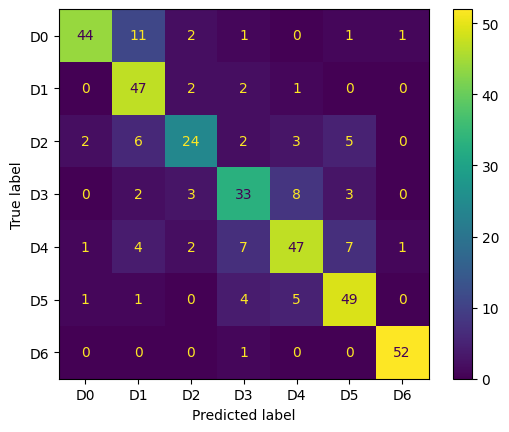

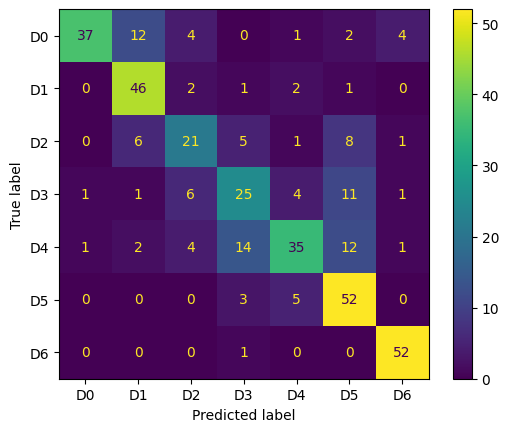

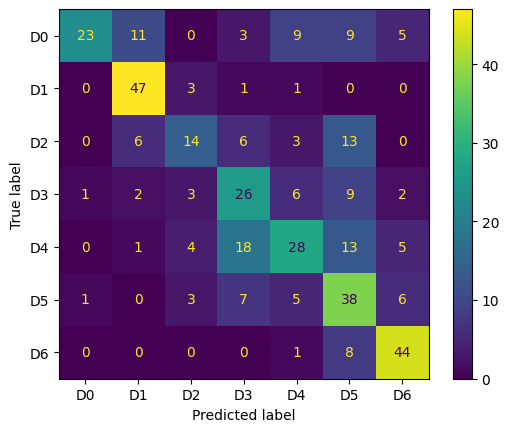

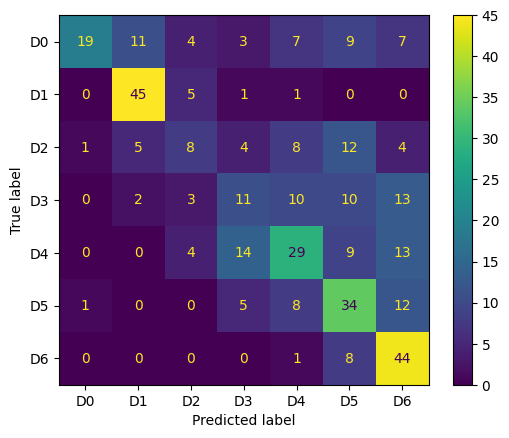

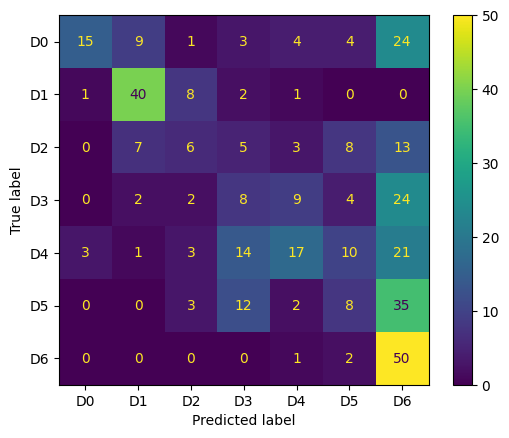

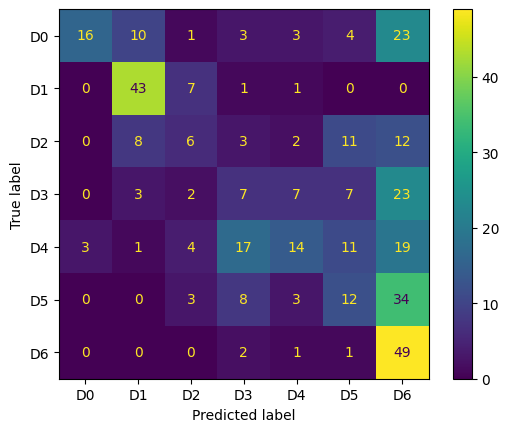

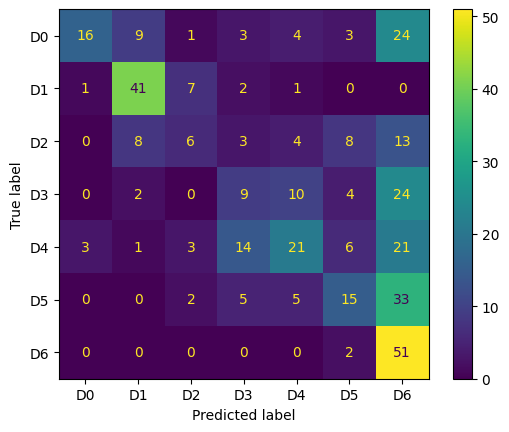

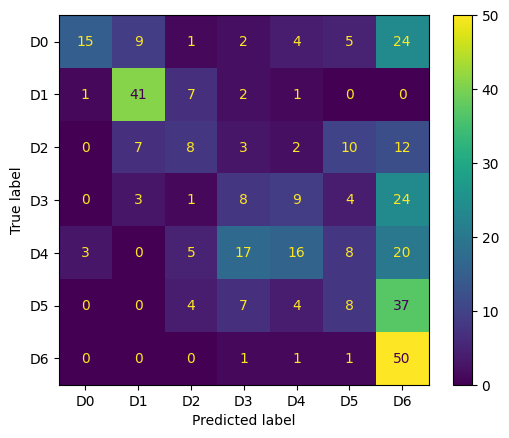

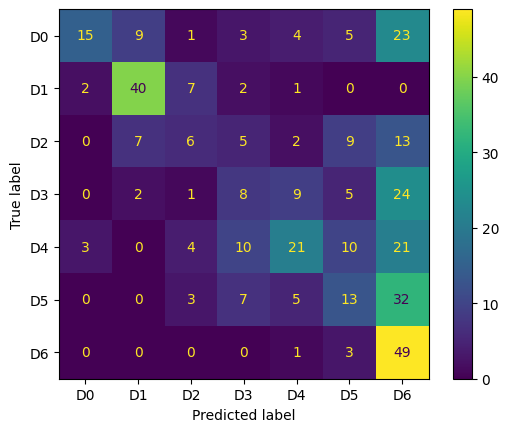

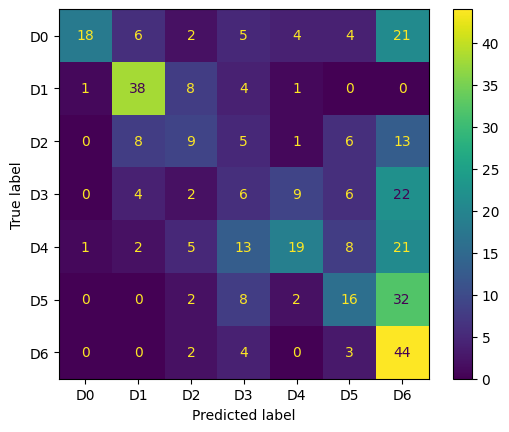

In [31]:
!pip install xgboost
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay




# Selectarea doar a coloanelor numerice
dataset_numeric = df.select_dtypes(include=[np.number])

print("Inainte:")
print(dataset_numeric.shape)
print("\n")

ran = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

for i in ran:
    print("Threshold:")
    print(i)
    
    # Aplicarea VarianceThreshold
    selector = VarianceThreshold(threshold=i)
    dataset_reduced = selector.fit_transform(dataset_numeric)
    
    print("dataset redus la:")
    print(dataset_reduced.shape)
    # Obținerea măștii de caracteristici selectate
    mask = selector.get_support()

    # Obținerea numelor caracteristicilor eliminate
    removed_features = dataset_numeric.columns[~mask]
    print("\nCaracteristicile eliminate:")
    print(removed_features)
   
    # Crearea unui scaler
    scaler = StandardScaler()

    # Standardizarea datelor numerice
    dataset_scaled = scaler.fit_transform(dataset_reduced)

    X = dataset_scaled
    y = dataset['Diagnostic']

    # Împărțim datele în setul de antrenare și setul de test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    print("\n")
    print("Random Forest:")
   
    # Pentru RandomForest
    param_grid = {'n_estimators': [10, 50, 100], 'max_depth': [None, 10, 20, 30], 'max_features': ['sqrt', 'log2', None]}
    grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
    grid_search.fit(X_train, y_train)

    print(grid_search.best_params_)
    print("\n")
    # Pentru fiecare algoritm
    y_pred = grid_search.best_estimator_.predict(X_test)

    # Generarea raportului de clasificare pentru excel
    report = classification_report(y_test, y_pred, output_dict=True)

    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Transformarea raportului într-un DataFrame
    report_df = pd.DataFrame(report).transpose()

    # Scrierea DataFrame-ului într-un fișier Excel
    report_df.to_excel("classification_report_RDM_FRST.xlsx")

    cm = confusion_matrix(y_test, y_pred)
    # print("Confusion Matrix:")
    # print(cm)

    print("Confusion Matrix:")

    classes = np.unique(y_pred)

    # Crearea unei instanțe a ConfusionMatrixDisplay
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)

    # Afișarea matricei de confuzie cu etichetele de clasă
    disp.plot()

Inainte:
(1921, 18)


Threshold:
0.1
dataset redus la:
(1921, 15)

Caracteristicile eliminate:
Index(['Height', 'Smoker', 'Calorie_monitoring'], dtype='object')


ExtraTrees:
{'max_depth': 20, 'max_features': 'sqrt', 'n_estimators': 100}


Classification Report:
              precision    recall  f1-score   support

          D0       0.88      0.75      0.81        60
          D1       0.66      0.83      0.74        52
          D2       0.57      0.50      0.53        42
          D3       0.69      0.69      0.69        49
          D4       0.84      0.70      0.76        69
          D5       0.71      0.85      0.77        60
          D6       0.96      0.98      0.97        53

    accuracy                           0.76       385
   macro avg       0.76      0.76      0.75       385
weighted avg       0.77      0.76      0.76       385

Confusion Matrix:
Threshold:
0.2
dataset redus la:
(1921, 11)

Caracteristicile eliminate:
Index(['Regular_fiber_diet', 'Diagnostic_in_famil

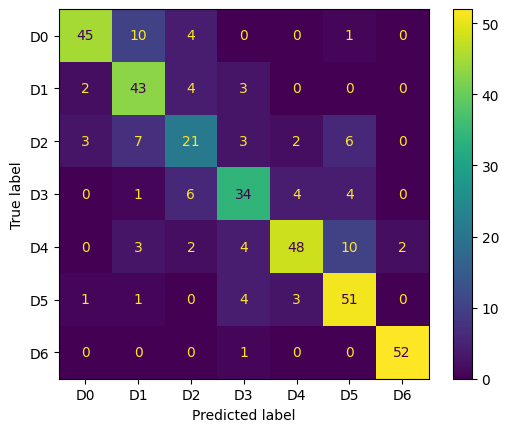

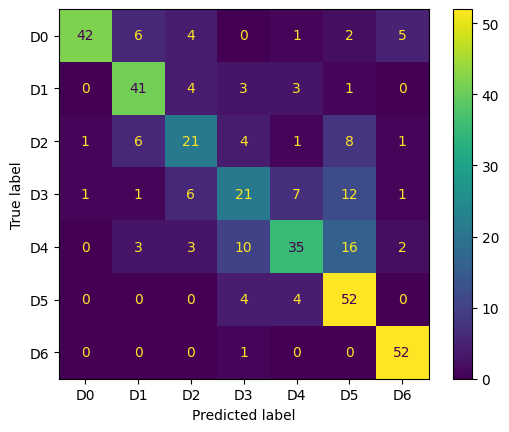

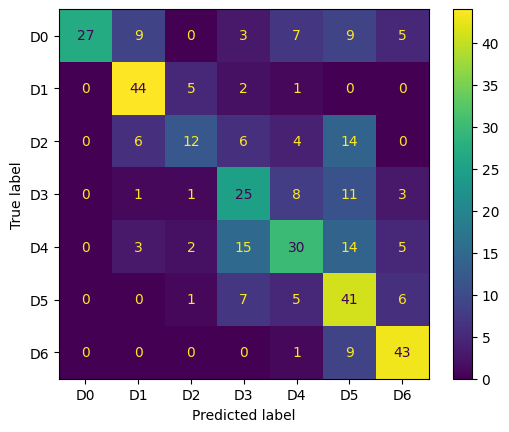

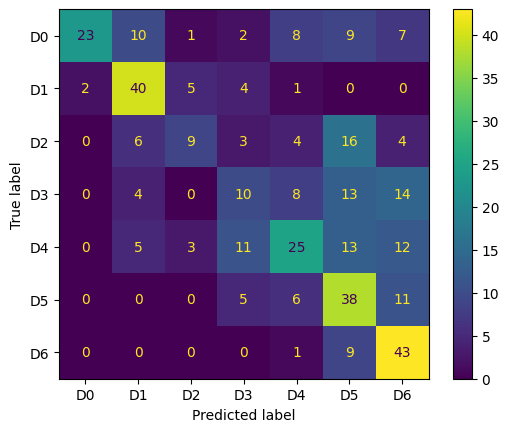

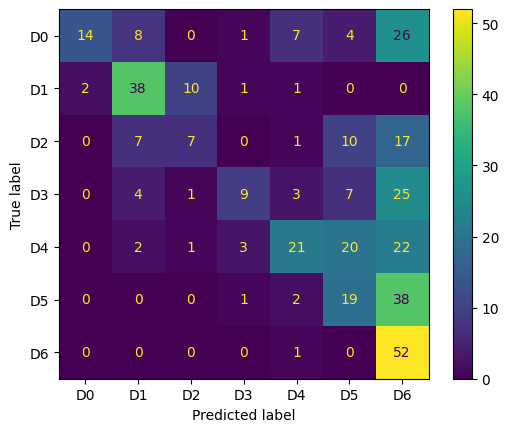

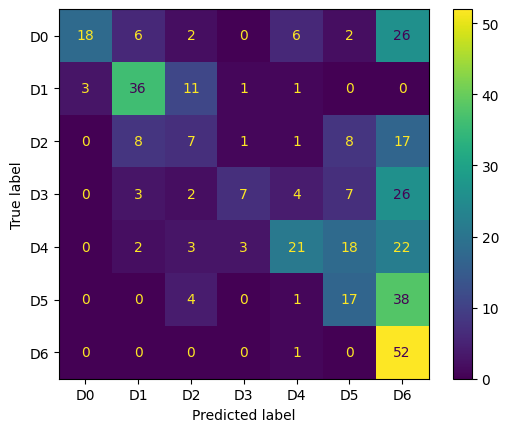

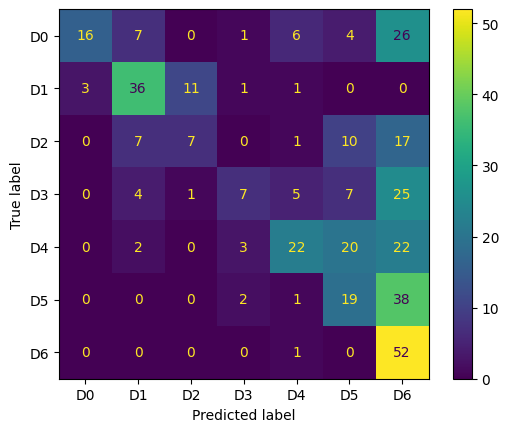

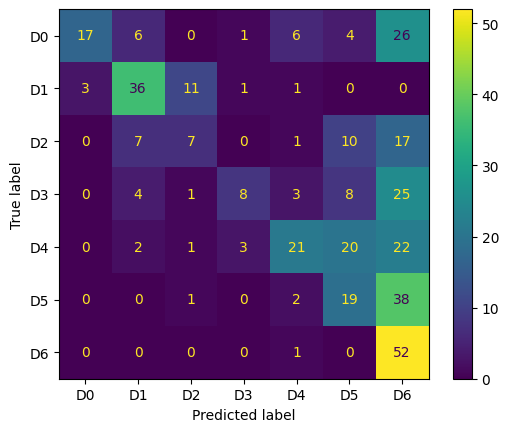

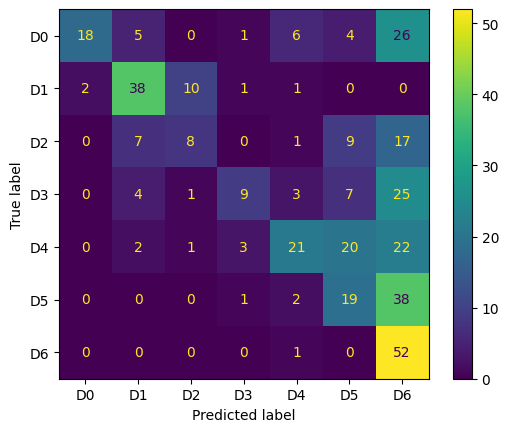

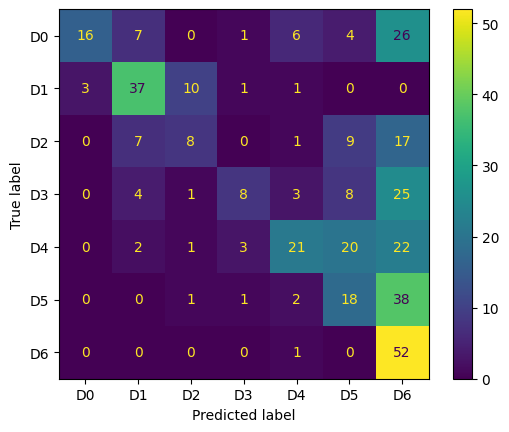

In [32]:
!pip install xgboost
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay




# Selectarea doar a coloanelor numerice
dataset_numeric = df.select_dtypes(include=[np.number])

print("Inainte:")
print(dataset_numeric.shape)
print("\n")

ran = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

for i in ran:
    print("Threshold:")
    print(i)
    
    # Aplicarea VarianceThreshold
    selector = VarianceThreshold(threshold=i)
    dataset_reduced = selector.fit_transform(dataset_numeric)
    
    print("dataset redus la:")
    print(dataset_reduced.shape)
    # Obținerea măștii de caracteristici selectate
    mask = selector.get_support()

    # Obținerea numelor caracteristicilor eliminate
    removed_features = dataset_numeric.columns[~mask]
    print("\nCaracteristicile eliminate:")
    print(removed_features)
   
    # Crearea unui scaler
    scaler = StandardScaler()

    # Standardizarea datelor numerice
    dataset_scaled = scaler.fit_transform(dataset_reduced)

    X = dataset_scaled
    y = dataset['Diagnostic']

    # Împărțim datele în setul de antrenare și setul de test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    print("\n")
    print("ExtraTrees:")
    
    # Pentru ExtraTrees
    param_grid = {'n_estimators': [10, 50, 100], 'max_depth': [None, 10, 20, 30], 'max_features': ['sqrt', 'log2', None]}
    grid_search = GridSearchCV(ExtraTreesClassifier(), param_grid, cv=5)
    grid_search.fit(X_train, y_train)

    print(grid_search.best_params_)
    print("\n")
    # Pentru fiecare algoritm
    y_pred = grid_search.best_estimator_.predict(X_test)

    # Generarea raportului de clasificare pentru excel
    report = classification_report(y_test, y_pred, output_dict=True)

    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Transformarea raportului într-un DataFrame
    report_df = pd.DataFrame(report).transpose()

    # Scrierea DataFrame-ului într-un fișier Excel
    report_df.to_excel("classification_report_EX_Trees.xlsx")

    cm = confusion_matrix(y_test, y_pred)
    # print("Confusion Matrix:")
    # print(cm)

    print("Confusion Matrix:")

    classes = np.unique(y_pred)

    # Crearea unei instanțe a ConfusionMatrixDisplay
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)

    # Afișarea matricei de confuzie cu etichetele de clasă
    disp.plot()


Inainte:
(1921, 18)


Threshold:
0.1
dataset redus la:
(1921, 15)

Caracteristicile eliminate:
Index(['Height', 'Smoker', 'Calorie_monitoring'], dtype='object')


GradientBoostedTrees:
{'learning_rate': 0.1, 'max_depth': 20, 'n_estimators': 100}


Classification Report:
              precision    recall  f1-score   support

          D0       0.88      0.75      0.81        60
          D1       0.72      0.88      0.79        52
          D2       0.66      0.50      0.57        42
          D3       0.62      0.71      0.67        49
          D4       0.73      0.62      0.67        69
          D5       0.74      0.85      0.79        60
          D6       0.96      0.98      0.97        53

    accuracy                           0.76       385
   macro avg       0.76      0.76      0.75       385
weighted avg       0.76      0.76      0.76       385

Threshold:
0.2
dataset redus la:
(1921, 11)

Caracteristicile eliminate:
Index(['Regular_fiber_diet', 'Diagnostic_in_family_history'

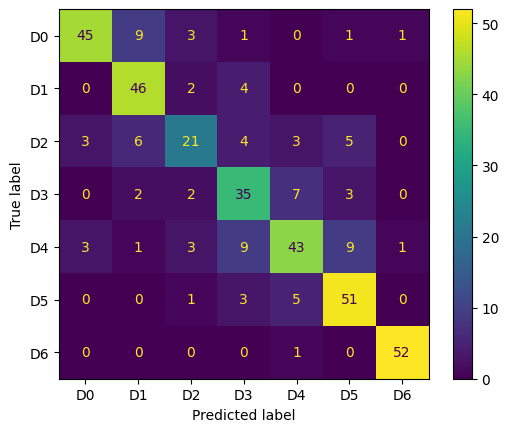

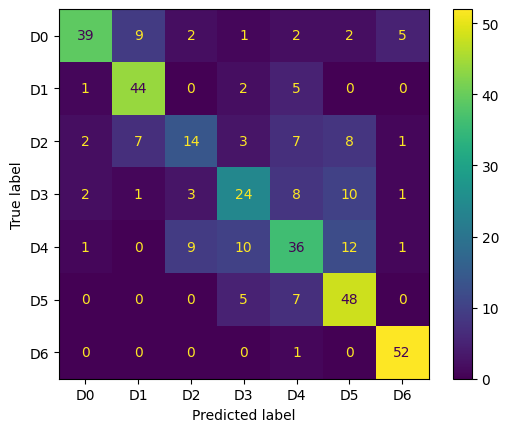

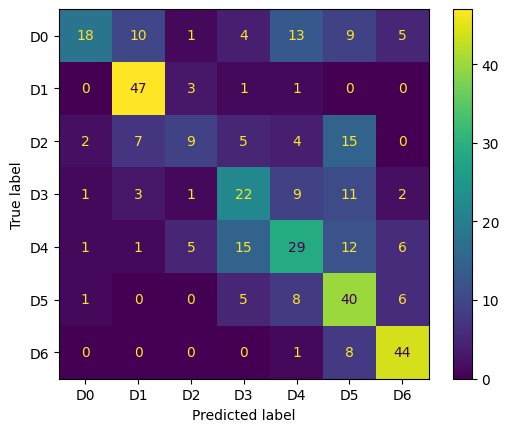

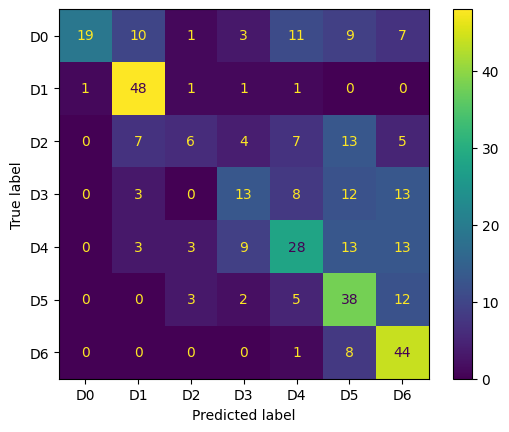

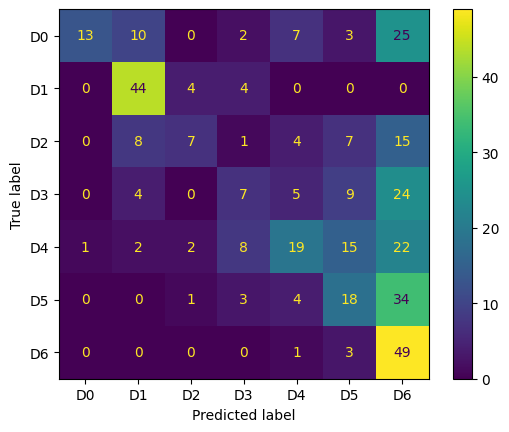

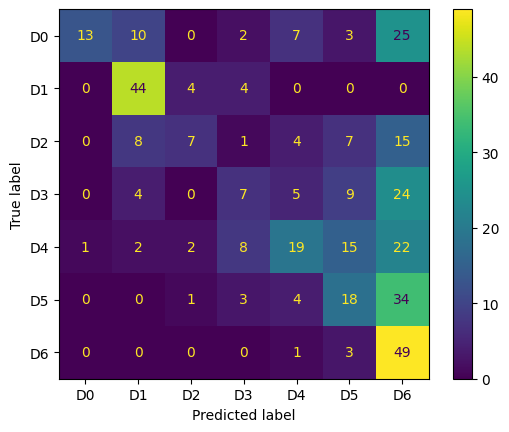

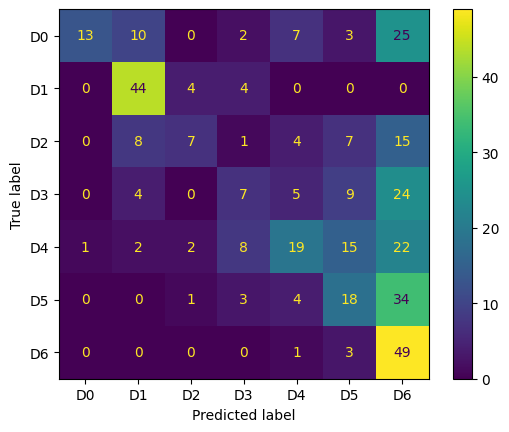

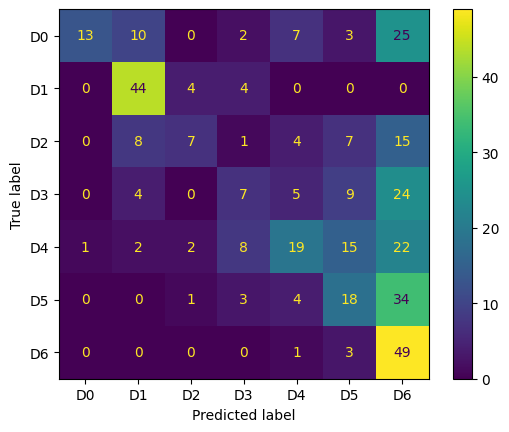

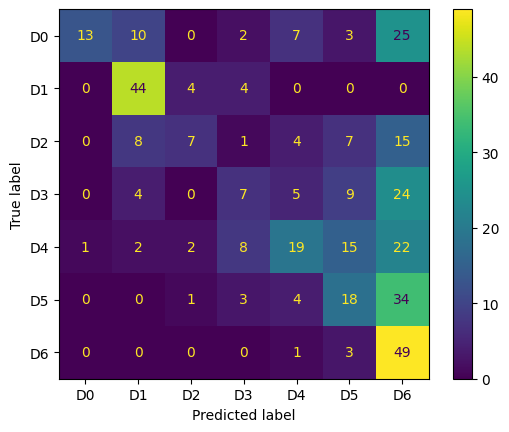

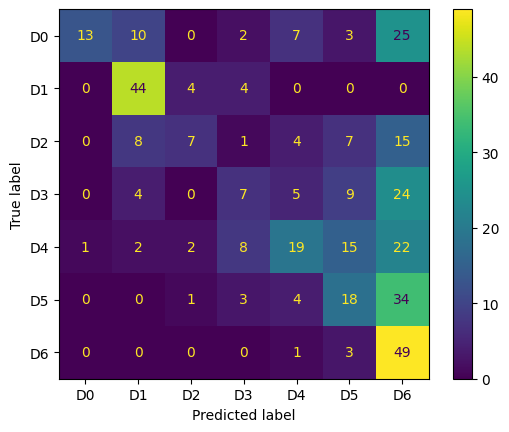

In [33]:
!pip install xgboost
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay




# Selectarea doar a coloanelor numerice
dataset_numeric = df.select_dtypes(include=[np.number])

print("Inainte:")
print(dataset_numeric.shape)
print("\n")

ran = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

for i in ran:
    print("Threshold:")
    print(i)
    
    # Aplicarea VarianceThreshold
    selector = VarianceThreshold(threshold=i)
    dataset_reduced = selector.fit_transform(dataset_numeric)
    
    print("dataset redus la:")
    print(dataset_reduced.shape)
    # Obținerea măștii de caracteristici selectate
    mask = selector.get_support()

    # Obținerea numelor caracteristicilor eliminate
    removed_features = dataset_numeric.columns[~mask]
    print("\nCaracteristicile eliminate:")
    print(removed_features)
   
    # Crearea unui scaler
    scaler = StandardScaler()

    # Standardizarea datelor numerice
    dataset_scaled = scaler.fit_transform(dataset_reduced)

    X = dataset_scaled
    y = dataset['Diagnostic']

    # Împărțim datele în setul de antrenare și setul de test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    print("\n")
    print("GradientBoostedTrees:")
    
    # Pentru GradientBoostedTrees
    # Crearea unui LabelEncoder
    le = LabelEncoder()

    # Transformarea etichetelor de clasă
    y_train_encoded = le.fit_transform(y_train)
    y_test_encoded = le.transform(y_test)

    # print("Label Encoding Mapping:")
    # for class_, label in zip(le.classes_, range(len(le.classes_))):
    #     print(f"{class_}: {label}")

    param_grid = {'n_estimators': [10, 50, 100], 'max_depth': [3, 10, 20, 30], 'learning_rate': [0.1, 0.01, 0.001]}
    grid_search = GridSearchCV(XGBClassifier(), param_grid, cv=5)
    grid_search.fit(X_train, y_train_encoded)

    print(grid_search.best_params_)
    print("\n")

    # Pentru fiecare algoritm
    y_pred = grid_search.best_estimator_.predict(X_test)

    # print("Classification Report:")
    # print(classification_report(y_test_encoded, y_pred))

    y_pred_decoded = le.inverse_transform(y_pred)

    # Generarea raportului de clasificare pentru excel
    report = classification_report(y_test, y_pred_decoded, output_dict=True)

    print("Classification Report:")
    print(classification_report(y_test, y_pred_decoded))

    # Transformarea raportului într-un DataFrame
    report_df = pd.DataFrame(report).transpose()

    # Scrierea DataFrame-ului într-un fișier Excel
    report_df.to_excel("classification_report_GR_Boost.xlsx")

    # Crearea matricei de confuzie
    cm = confusion_matrix(y_test_encoded, y_pred)

    # Crearea unei instanțe a ConfusionMatrixDisplay
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)

    # Afișarea matricei de confuzie cu etichetele de clasă
    disp.plot()


## Varianta mea

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold, SelectPercentile
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Selectarea doar a coloanelor numerice
dataset_numeric = df.select_dtypes(include=[np.number])

dataset_numeric = dataset_numeric.drop("Age", axis=1)
dataset_numeric = dataset_numeric.drop("Weight", axis=1)
# dataset_numeric = dataset_numeric.drop("Physical_activity_level", axis=1)

# Crearea unui scaler
scaler = StandardScaler()

# Standardizarea datelor numerice
dataset_scaled = scaler.fit_transform(dataset_numeric)

print(dataset_scaled.shape)

# # Aplicarea VarianceThreshold
# selector = VarianceThreshold(threshold=0.5)
# dataset_reduced = selector.fit_transform(dataset_scaled)

print(dataset_scaled.shape)

# Impartim din nou setul de date
X = dataset_scaled
y = dataset['Diagnostic']

# Împărțim datele în setul de antrenare și setul de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

(1921, 16)
(1921, 16)


{'C': 10, 'kernel': 'rbf'}


Classification Report:
              precision    recall  f1-score   support

          D0       0.84      0.72      0.77        60
          D1       0.51      0.58      0.54        52
          D2       0.55      0.55      0.55        42
          D3       0.60      0.59      0.60        49
          D4       0.76      0.59      0.67        69
          D5       0.66      0.85      0.74        60
          D6       0.96      0.98      0.97        53

    accuracy                           0.70       385
   macro avg       0.70      0.69      0.69       385
weighted avg       0.71      0.70      0.70       385

Confusion Matrix:


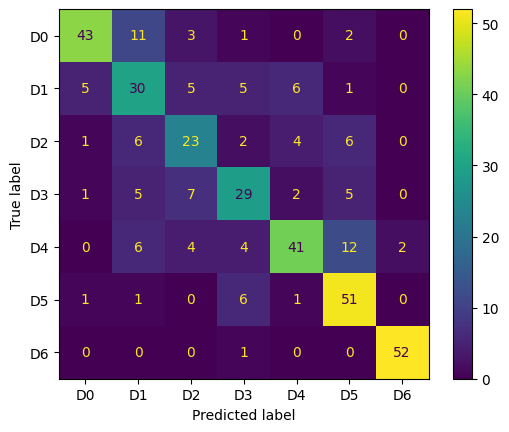

In [35]:
# Pentru SVM
param_grid = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)
print("\n")
# Pentru fiecare algoritm
y_pred = grid_search.best_estimator_.predict(X_test)

# Generarea raportului de clasificare pentru excel
report = classification_report(y_test, y_pred, output_dict=True)

print("Classification Report:")
print(classification_report(y_test, y_pred))

# Transformarea raportului într-un DataFrame
report_df = pd.DataFrame(report).transpose()

# Scrierea DataFrame-ului într-un fișier Excel
report_df.to_excel("classification_report_SVM.xlsx")

cm = confusion_matrix(y_test, y_pred)
# print("Confusion Matrix:")
# print(cm)

print("Confusion Matrix:")

classes = np.unique(y_pred)

# Crearea unei instanțe a ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)

# Afișarea matricei de confuzie cu etichetele de clasă
disp.plot()

{'max_depth': None, 'max_features': 'log2', 'n_estimators': 100}


Classification Report:
              precision    recall  f1-score   support

          D0       0.93      0.72      0.81        60
          D1       0.61      0.83      0.70        52
          D2       0.67      0.62      0.64        42
          D3       0.76      0.71      0.74        49
          D4       0.86      0.70      0.77        69
          D5       0.77      0.93      0.84        60
          D6       0.95      0.98      0.96        53

    accuracy                           0.79       385
   macro avg       0.79      0.78      0.78       385
weighted avg       0.80      0.79      0.79       385

Confusion Matrix:


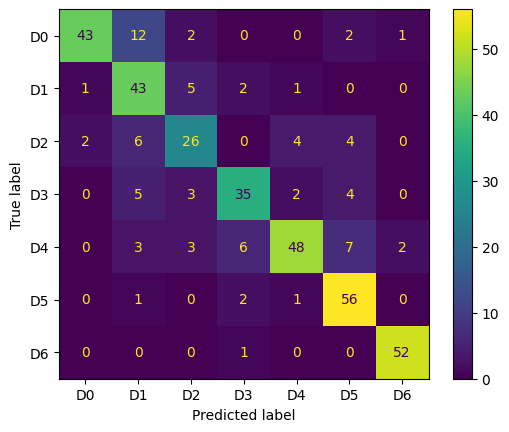

In [36]:
# Pentru RandomForest
param_grid = {'n_estimators': [10, 50, 100], 'max_depth': [None, 10, 20, 30], 'max_features': ['sqrt', 'log2', None]}
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)
print("\n")
# Pentru fiecare algoritm
y_pred = grid_search.best_estimator_.predict(X_test)

# Generarea raportului de clasificare pentru excel
report = classification_report(y_test, y_pred, output_dict=True)

print("Classification Report:")
print(classification_report(y_test, y_pred))

# Transformarea raportului într-un DataFrame
report_df = pd.DataFrame(report).transpose()

# Scrierea DataFrame-ului într-un fișier Excel
report_df.to_excel("classification_report_RDM_FRST.xlsx")

cm = confusion_matrix(y_test, y_pred)
# print("Confusion Matrix:")
# print(cm)

print("Confusion Matrix:")

classes = np.unique(y_pred)

# Crearea unei instanțe a ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)

# Afișarea matricei de confuzie cu etichetele de clasă
disp.plot()

{'max_depth': 20, 'max_features': 'sqrt', 'n_estimators': 50}


Classification Report:
              precision    recall  f1-score   support

          D0       0.94      0.77      0.84        60
          D1       0.62      0.75      0.68        52
          D2       0.73      0.71      0.72        42
          D3       0.77      0.76      0.76        49
          D4       0.85      0.77      0.81        69
          D5       0.75      0.85      0.80        60
          D6       0.96      0.98      0.97        53

    accuracy                           0.80       385
   macro avg       0.80      0.80      0.80       385
weighted avg       0.81      0.80      0.80       385

Confusion Matrix:


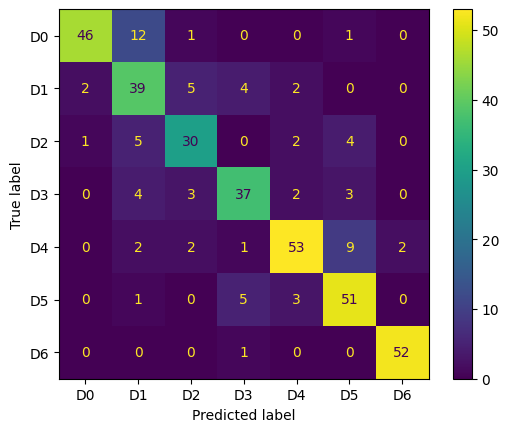

In [37]:
# Pentru ExtraTrees
param_grid = {'n_estimators': [10, 50, 100], 'max_depth': [None, 10, 20, 30], 'max_features': ['sqrt', 'log2', None]}
grid_search = GridSearchCV(ExtraTreesClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)
print("\n")
# Pentru fiecare algoritm
y_pred = grid_search.best_estimator_.predict(X_test)

# Generarea raportului de clasificare pentru excel
report = classification_report(y_test, y_pred, output_dict=True)

print("Classification Report:")
print(classification_report(y_test, y_pred))

# Transformarea raportului într-un DataFrame
report_df = pd.DataFrame(report).transpose()

# Scrierea DataFrame-ului într-un fișier Excel
report_df.to_excel("classification_report_EX_Trees.xlsx")

cm = confusion_matrix(y_test, y_pred)
# print("Confusion Matrix:")
# print(cm)

print("Confusion Matrix:")

classes = np.unique(y_pred)

# Crearea unei instanțe a ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)

# Afișarea matricei de confuzie cu etichetele de clasă
disp.plot()


{'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 100}


Classification Report:
              precision    recall  f1-score   support

          D0       0.91      0.70      0.79        60
          D1       0.66      0.81      0.72        52
          D2       0.60      0.57      0.59        42
          D3       0.73      0.67      0.70        49
          D4       0.80      0.68      0.73        69
          D5       0.74      0.93      0.82        60
          D6       0.95      0.98      0.96        53

    accuracy                           0.77       385
   macro avg       0.77      0.76      0.76       385
weighted avg       0.78      0.77      0.77       385



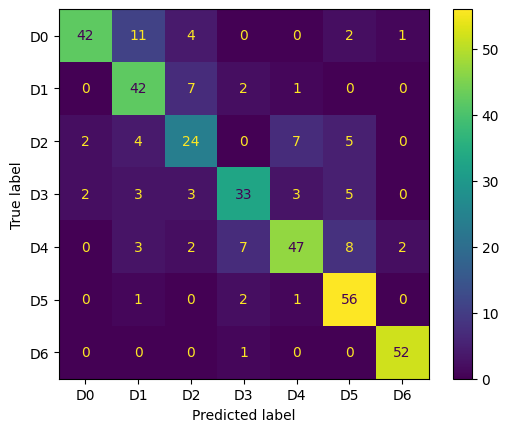

In [38]:
# Pentru GradientBoostedTrees
# Crearea unui LabelEncoder
le = LabelEncoder()

# Transformarea etichetelor de clasă
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# print("Label Encoding Mapping:")
# for class_, label in zip(le.classes_, range(len(le.classes_))):
#     print(f"{class_}: {label}")

param_grid = {'n_estimators': [10, 50, 100], 'max_depth': [3, 10, 20, 30], 'learning_rate': [0.1, 0.01, 0.001]}
grid_search = GridSearchCV(XGBClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train_encoded)

print(grid_search.best_params_)
print("\n")

# Pentru fiecare algoritm
y_pred = grid_search.best_estimator_.predict(X_test)

# print("Classification Report:")
# print(classification_report(y_test_encoded, y_pred))

y_pred_decoded = le.inverse_transform(y_pred)

# Generarea raportului de clasificare pentru excel
report = classification_report(y_test, y_pred_decoded, output_dict=True)

print("Classification Report:")
print(classification_report(y_test, y_pred_decoded))

# Transformarea raportului într-un DataFrame
report_df = pd.DataFrame(report).transpose()

# Scrierea DataFrame-ului într-un fișier Excel
report_df.to_excel("classification_report_GR_Boost.xlsx")

# Crearea matricei de confuzie
cm = confusion_matrix(y_test_encoded, y_pred)

# Crearea unei instanțe a ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)

# Afișarea matricei de confuzie cu etichetele de clasă
disp.plot()


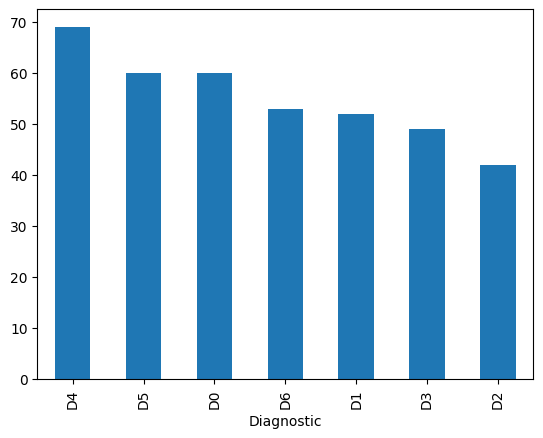

In [39]:
# Calculăm frecvența fiecărei clase
frecventa_clase = y_test.value_counts()

# Creăm un bar plot cu frecvența claselor
frecventa_clase.plot.bar()

plt.show()  # Afișează graficul